In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

In [4]:
vaccination_by_manufacturer[vaccination_by_manufacturer["is_western_europe"]]["country"].unique()

array(['Belgium', 'France', 'Ireland', 'Luxembourg', 'Netherlands'],
      dtype=object)

## Distribution of Manufacturers

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\3998938153.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\3998938153.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\3998938153.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)


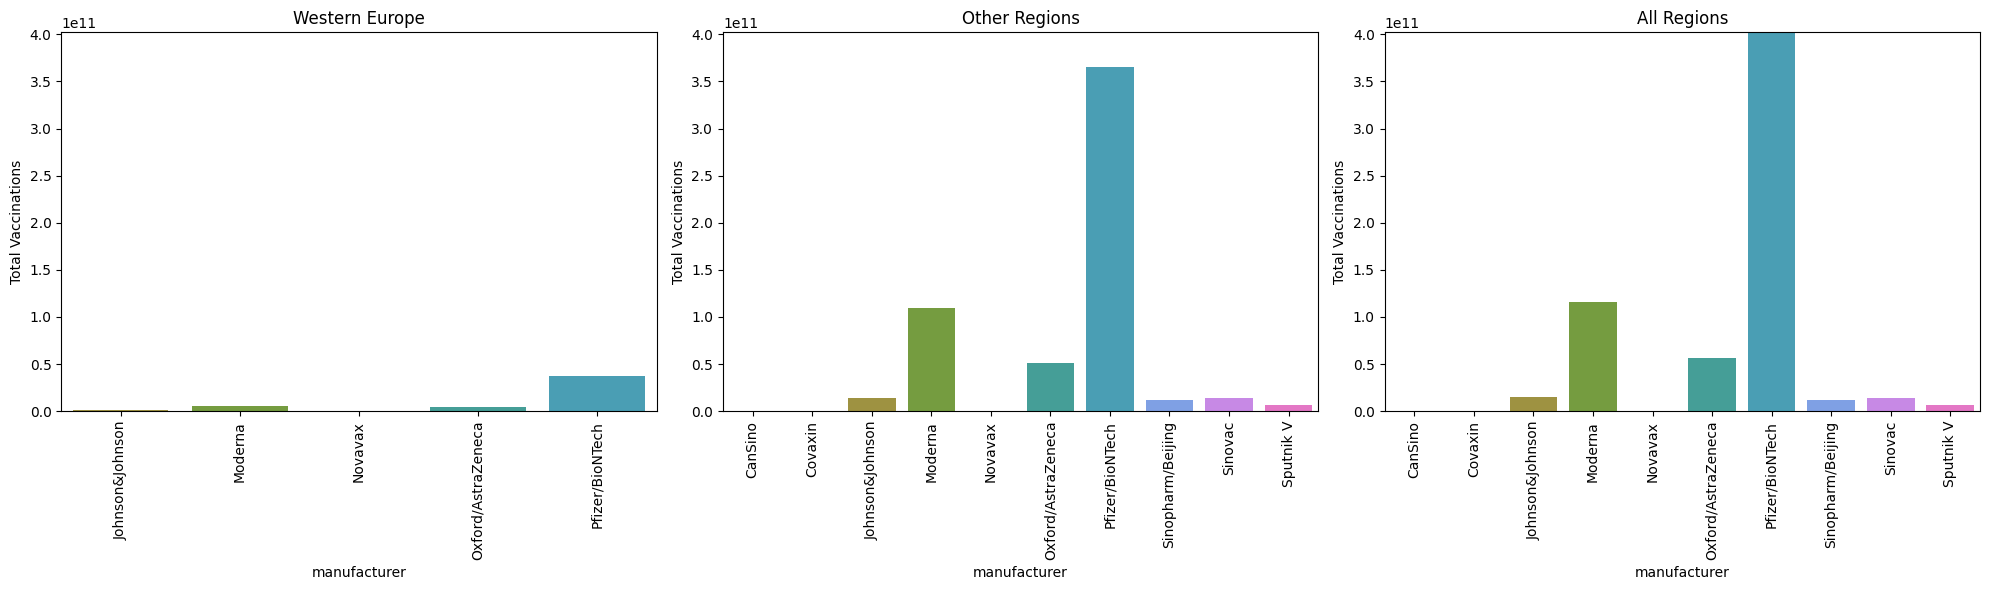

In [5]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby('manufacturer')['total_vaccinations'].sum()

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_data))
manufacturer_colors = dict(zip(all_data.index, color_palette))

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=western_data.index, y=western_data.values, ax=ax1,
            hue=western_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in western_data.index])
ax1.set_title('Western Europe')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot for Other Regions
sns.barplot(x=other_data.index, y=other_data.values, ax=ax2,
            hue=other_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in other_data.index])
ax2.set_title('Other Regions')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Plot for All Regions
sns.barplot(x=all_data.index, y=all_data.values, ax=ax3,
            hue=all_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in all_data.index])
ax3.set_title('All Regions')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Total Vaccinations')
ax3.set_ylim(0, max_y)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\150032742.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(all_manufacturers, rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\150032742.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_manufacturers, rotation=90)


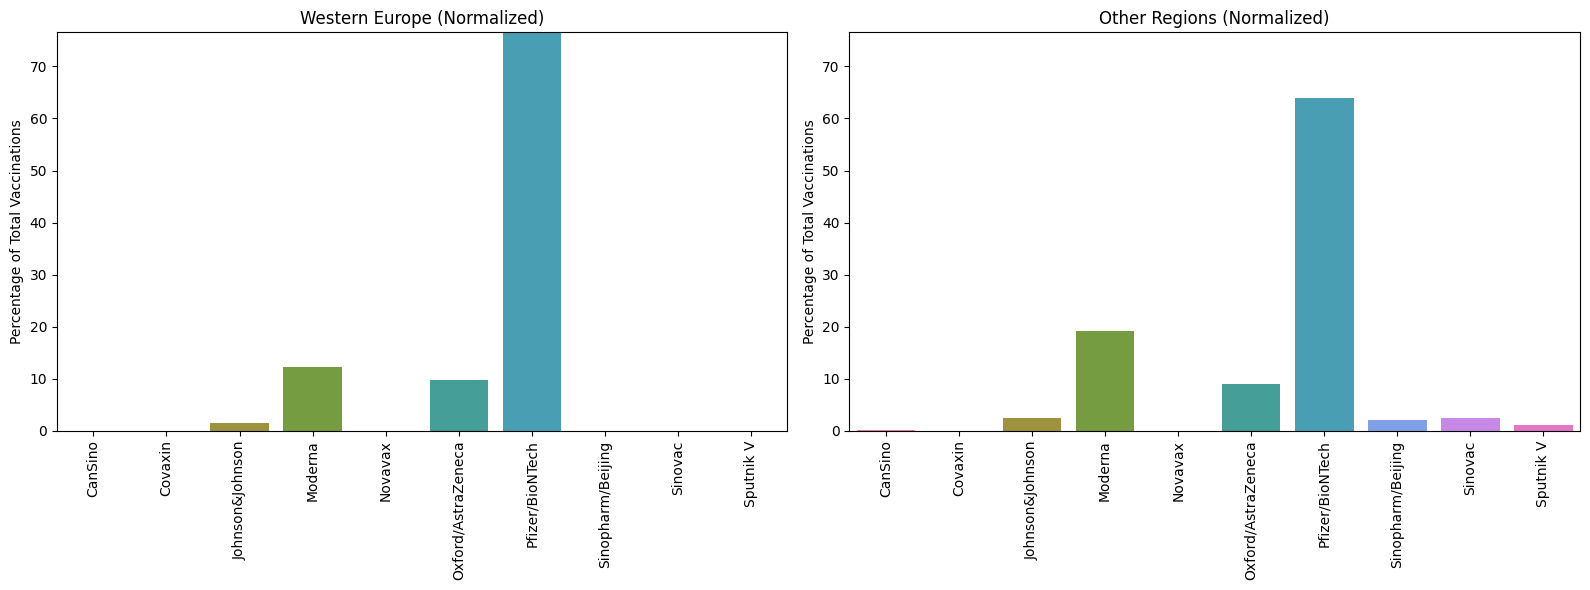

In [57]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / western_data.sum()) * 100
other_data = (other_data / other_data.sum()) * 100
all_data = (all_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)
all_data = all_data.reindex(all_manufacturers, fill_value=0)

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_manufacturers))
manufacturer_colors = dict(zip(all_manufacturers, color_palette))

# Create three subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=all_manufacturers, y=western_data.values, ax=ax1,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax1.set_title('Western Europe (Normalized)')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Percentage of Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(all_manufacturers, rotation=90)

# Plot for Other Regions
sns.barplot(x=all_manufacturers, y=other_data.values, ax=ax2,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax2.set_title('Other Regions (Normalized)')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Percentage of Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(all_manufacturers, rotation=90)

# # Plot for All Regions
# sns.barplot(x=all_manufacturers, y=all_data.values, ax=ax3,
#             hue=all_manufacturers, legend=False,
#             palette=[manufacturer_colors[m] for m in all_manufacturers])
# ax3.set_title('All Regions (Normalized)')
# ax3.tick_params(axis='x', rotation=90)
# ax3.set_ylabel('Percentage of Total Vaccinations')
# ax3.set_ylim(0, max_y)
# ax3.set_xticklabels(all_manufacturers, rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

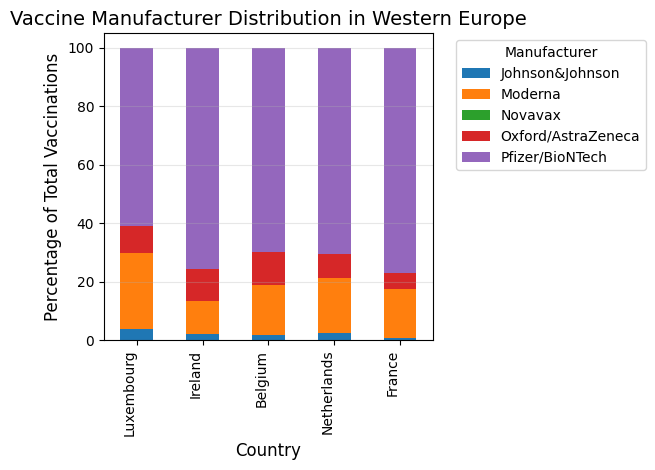

In [59]:
# Get Western European countries and their vaccine distributions
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]

# Get the latest data for each country-manufacturer combination
latest_data = western_data.sort_values('date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

# Calculate percentage of vaccinations by manufacturer for each country
total_by_country = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(lambda x: (x['total_vaccinations'] / total_by_country[x['country']]) * 100, axis=1)

# Create a pivot table for easier plotting
pivot_data = latest_data.pivot(index='country', columns='manufacturer', values='percentage').fillna(0)

# Sort countries by total vaccinations
country_order = latest_data.groupby('country')['total_vaccinations'].sum().sort_values(ascending=True).index

# Plot the distribution
plt.figure(figsize=(15, 10))
pivot_data.reindex(country_order).plot(kind='bar', stacked=True)

plt.title('Vaccine Manufacturer Distribution in Western Europe', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

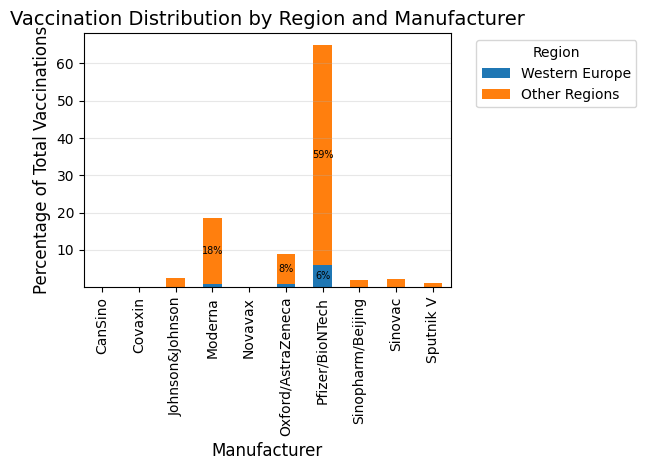

In [54]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / all_data.sum()) * 100
other_data = (other_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Western Europe': western_data,
    'Other Regions': other_data
})

# Create a single figure
plt.figure(figsize=(16, 9))

# Create stacked bar plot
ax = plot_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Vaccination Distribution by Region and Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for c in ax.containers:
    # Add labels only for values >= 5%
    labels = [f'{v:.0f}%' if v >= 5 else '' for v in [rect.get_height() for rect in c]]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()


## Vaccination Performance Analysis by Manufacturer

We'll analyze manufacturer performance using several metrics:

1. **Total vaccinations**: Raw number of vaccinations administered by manufacturer
2. **Geographic reach**: Number of countries using each manufacturer's vaccines
3. **Market share**: Percentage of global vaccinations by manufacturer
4. **Temporal adoption**: Rate of vaccine adoption over time
5. **Regional performance**: Comparison of vaccine usage in Western Europe vs. other regions

In [7]:
# Examine the vaccination_by_manufacturer dataframe
print("Columns:", vaccination_by_manufacturer.columns.tolist())
print("\nFirst few rows:")
vaccination_by_manufacturer.head()

Columns: ['date', 'country', 'manufacturer', 'total_vaccinations', 'is_western_europe']

First few rows:


,date,country,manufacturer,total_vaccinations,is_western_europe
0,2021-02-05,Argentina,CanSino,3.0,False
1,2021-02-06,Argentina,CanSino,3.0,False
2,2021-02-07,Argentina,CanSino,3.0,False
3,2021-02-08,Argentina,CanSino,3.0,False
4,2021-02-09,Argentina,CanSino,3.0,False


In [8]:
# 1. Total vaccinations by manufacturer
total_by_manufacturer = vaccination_by_manufacturer.groupby('manufacturer')['total_vaccinations'].sum().sort_values(ascending=False)

# 2. Geographic reach: Number of countries using each manufacturer's vaccines
geographic_reach = vaccination_by_manufacturer.groupby('manufacturer')['country'].nunique().sort_values(ascending=False)

# Create a DataFrame with both metrics
performance_df = pd.DataFrame({
    'Total Vaccinations': total_by_manufacturer,
    'Countries Reached': geographic_reach
})

# Calculate market share percentage
performance_df['Market Share (%)'] = (performance_df['Total Vaccinations'] / performance_df['Total Vaccinations'].sum() * 100).round(2)

# Sort by total vaccinations
performance_df = performance_df.sort_values('Total Vaccinations', ascending=False)

# Display the performance metrics
print("\nVaccination Performance by Manufacturer:")
performance_df


Vaccination Performance by Manufacturer:


,Total Vaccinations,Countries Reached,Market Share (%)
manufacturer,,,
Pfizer/BioNTech,4.022002e+11,43,64.84
Moderna,1.157790e+11,37,18.67
Oxford/AstraZeneca,5.586027e+10,37,9.01
Johnson&Johnson,1.498298e+10,35,2.42
Sinovac,1.340758e+10,8,2.16
Sinopharm/Beijing,1.157510e+10,7,1.87
Sputnik V,6.190721e+09,4,1.00
CanSino,2.713977e+08,3,0.04
Novavax,8.395152e+06,18,0.00


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\1648546527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Total Vaccinations'],
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\1648546527.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Countries Reached'],


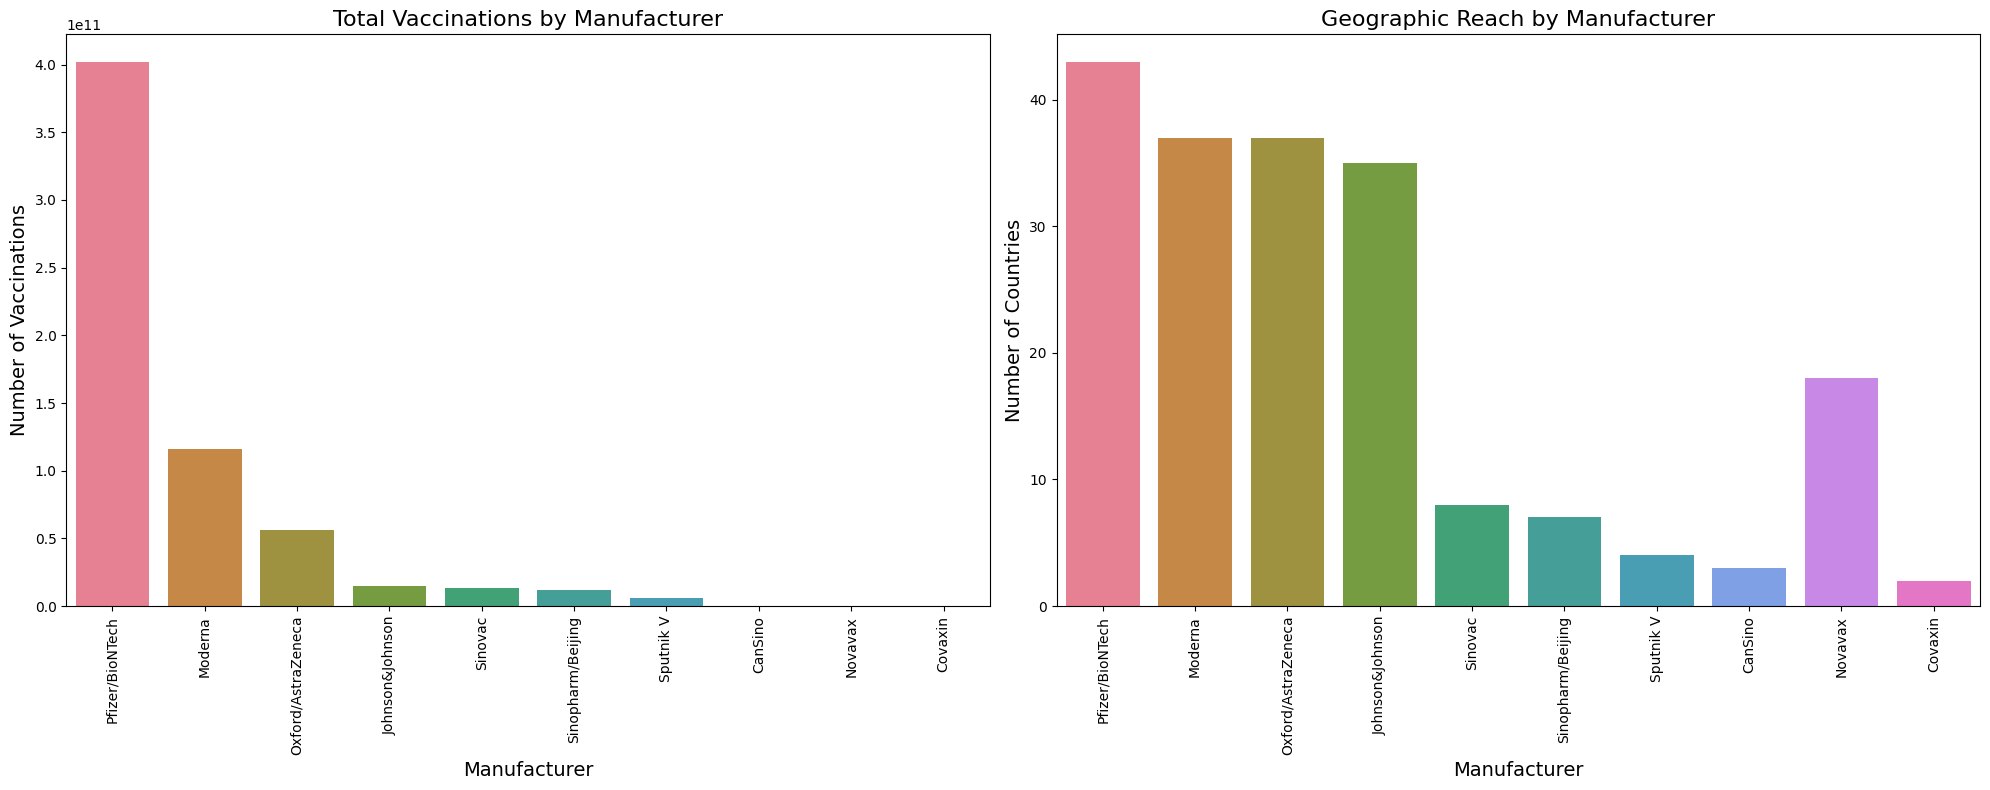

In [9]:
# Create a color palette
colors = sns.color_palette('husl', n_colors=len(performance_df))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Plot total vaccinations
sns.barplot(x=performance_df.index, y=performance_df['Total Vaccinations'], 
            palette=colors, ax=ax1)
ax1.set_title('Total Vaccinations by Manufacturer', fontsize=16)
ax1.set_ylabel('Number of Vaccinations', fontsize=14)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# 2. Plot geographic reach
sns.barplot(x=performance_df.index, y=performance_df['Countries Reached'], 
            palette=colors, ax=ax2)
ax2.set_title('Geographic Reach by Manufacturer', fontsize=16)
ax2.set_ylabel('Number of Countries', fontsize=14)
ax2.set_xlabel('Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

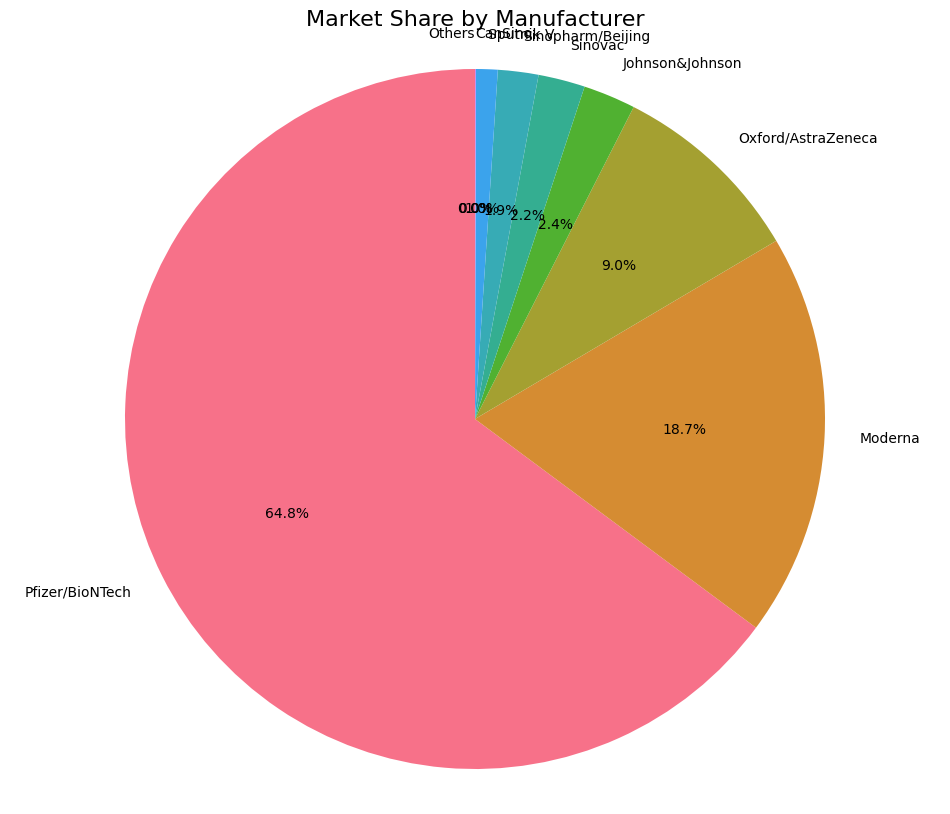

In [10]:
# Create a pie chart for market share
plt.figure(figsize=(12, 10))

# Keep only the top 8 manufacturers, group the rest as "Others"
top_n = 8
top_manufacturers = performance_df.iloc[:top_n].copy()
others = pd.DataFrame({
    'Total Vaccinations': [performance_df.iloc[top_n:]['Total Vaccinations'].sum()],
    'Market Share (%)': [performance_df.iloc[top_n:]['Market Share (%)'].sum()]
}, index=['Others'])

pie_data = pd.concat([top_manufacturers, others])

# Create a pie chart
plt.pie(pie_data['Market Share (%)'], labels=pie_data.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('husl', n_colors=len(pie_data)))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Market Share by Manufacturer', fontsize=16)
plt.show()

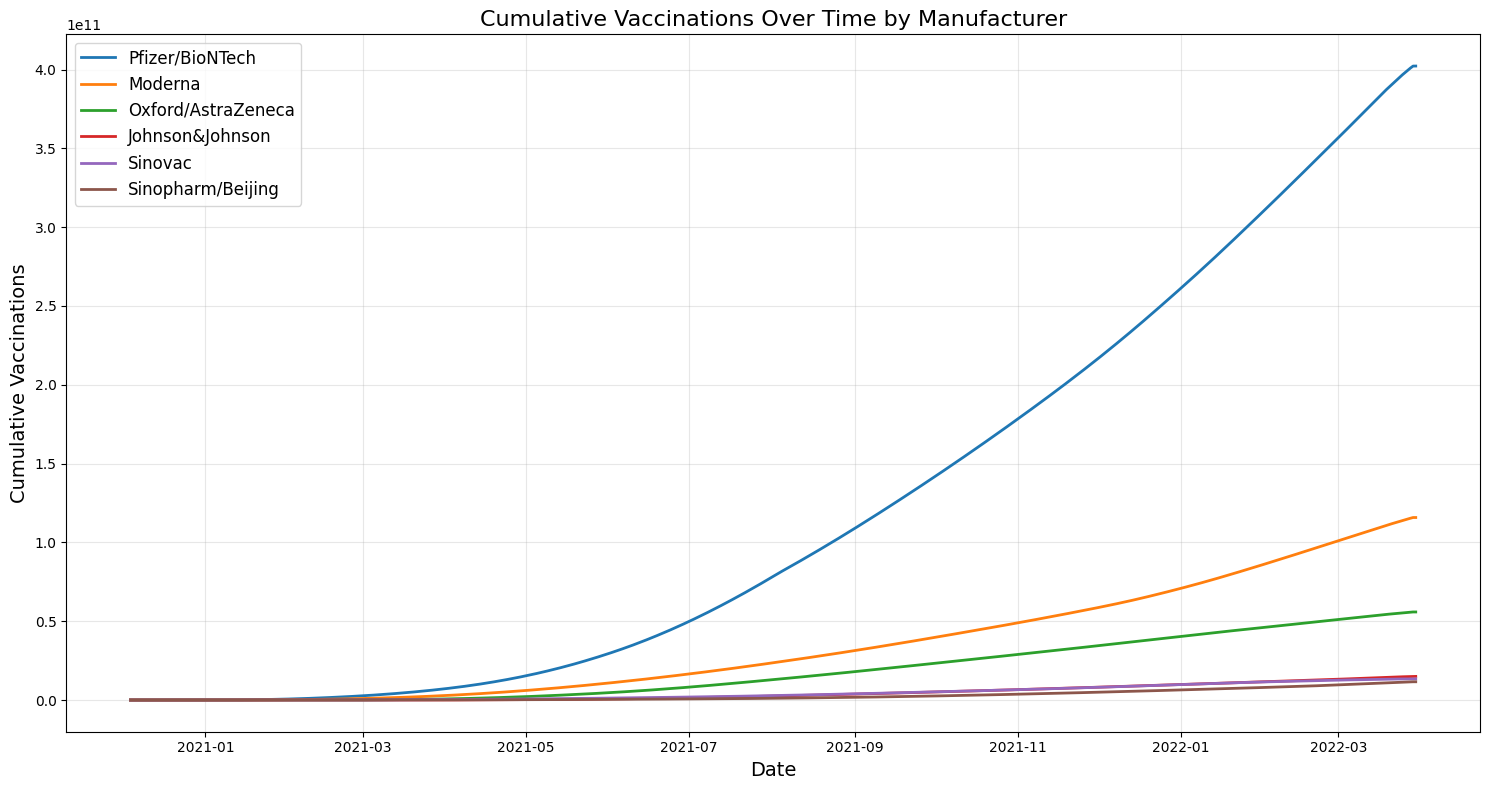

In [11]:
# Analyze vaccine adoption over time for top manufacturers
# Convert date to datetime format
vaccination_by_manufacturer['date'] = pd.to_datetime(vaccination_by_manufacturer['date'])

# Get top 6 manufacturers by total vaccinations
top_manufacturers = total_by_manufacturer.nlargest(6).index.tolist()

# Group by date and manufacturer, and sum vaccinations
temporal_data = vaccination_by_manufacturer[vaccination_by_manufacturer['manufacturer'].isin(top_manufacturers)]
temporal_data = temporal_data.groupby(['date', 'manufacturer'])['total_vaccinations'].sum().reset_index()

# Create a cumulative sum for each manufacturer over time
cumulative_data = temporal_data.pivot(index='date', columns='manufacturer', values='total_vaccinations')
cumulative_data = cumulative_data.fillna(0).cumsum()

# Plot the adoption curves
plt.figure(figsize=(15, 8))
for manufacturer in top_manufacturers:
    if manufacturer in cumulative_data.columns:
        plt.plot(cumulative_data.index, cumulative_data[manufacturer], label=manufacturer, linewidth=2)

plt.title('Cumulative Vaccinations Over Time by Manufacturer', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Vaccinations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
# Regional performance comparison
# Calculate total vaccinations for each manufacturer by region
western_europe = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]
other_regions = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']]

# Group by manufacturer and calculate total vaccinations for each region
western_europe_totals = western_europe.groupby('manufacturer')['total_vaccinations'].sum()
other_regions_totals = other_regions.groupby('manufacturer')['total_vaccinations'].sum()

# Create a DataFrame with both metrics
regional_performance = pd.DataFrame({
    'Western Europe': western_europe_totals,
    'Other Regions': other_regions_totals
})

# Calculate the percentage share in each region
regional_performance['Western Europe (%)'] = (regional_performance['Western Europe'] / regional_performance['Western Europe'].sum() * 100).round(2)
regional_performance['Other Regions (%)'] = (regional_performance['Other Regions'] / regional_performance['Other Regions'].sum() * 100).round(2)

# Sort by total vaccinations
regional_performance = regional_performance.fillna(0).sort_values('Western Europe', ascending=False)

# Display the regional performance metrics
print("\nRegional Performance by Manufacturer:")
regional_performance


Regional Performance by Manufacturer:


,Western Europe,Other Regions,Western Europe (%),Other Regions (%)
manufacturer,,,,
Pfizer/BioNTech,3.699752e+10,3.652027e+11,76.56,63.85
Moderna,5.902175e+09,1.098768e+11,12.21,19.21
Oxford/AstraZeneca,4.707398e+09,5.115287e+10,9.74,8.94
Johnson&Johnson,7.173895e+08,1.426559e+10,1.48,2.49
Novavax,5.204000e+03,8.389948e+06,0.00,0.00
CanSino,0.000000e+00,2.713977e+08,0.00,0.05
Covaxin,0.000000e+00,4.667000e+03,0.00,0.00
Sinopharm/Beijing,0.000000e+00,1.157510e+10,0.00,2.02
Sinovac,0.000000e+00,1.340758e+10,0.00,2.34


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\629064272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_western.index, y=top_western['Western Europe (%)'],
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\629064272.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_other.index, y=top_other['Other Regions (%)'],


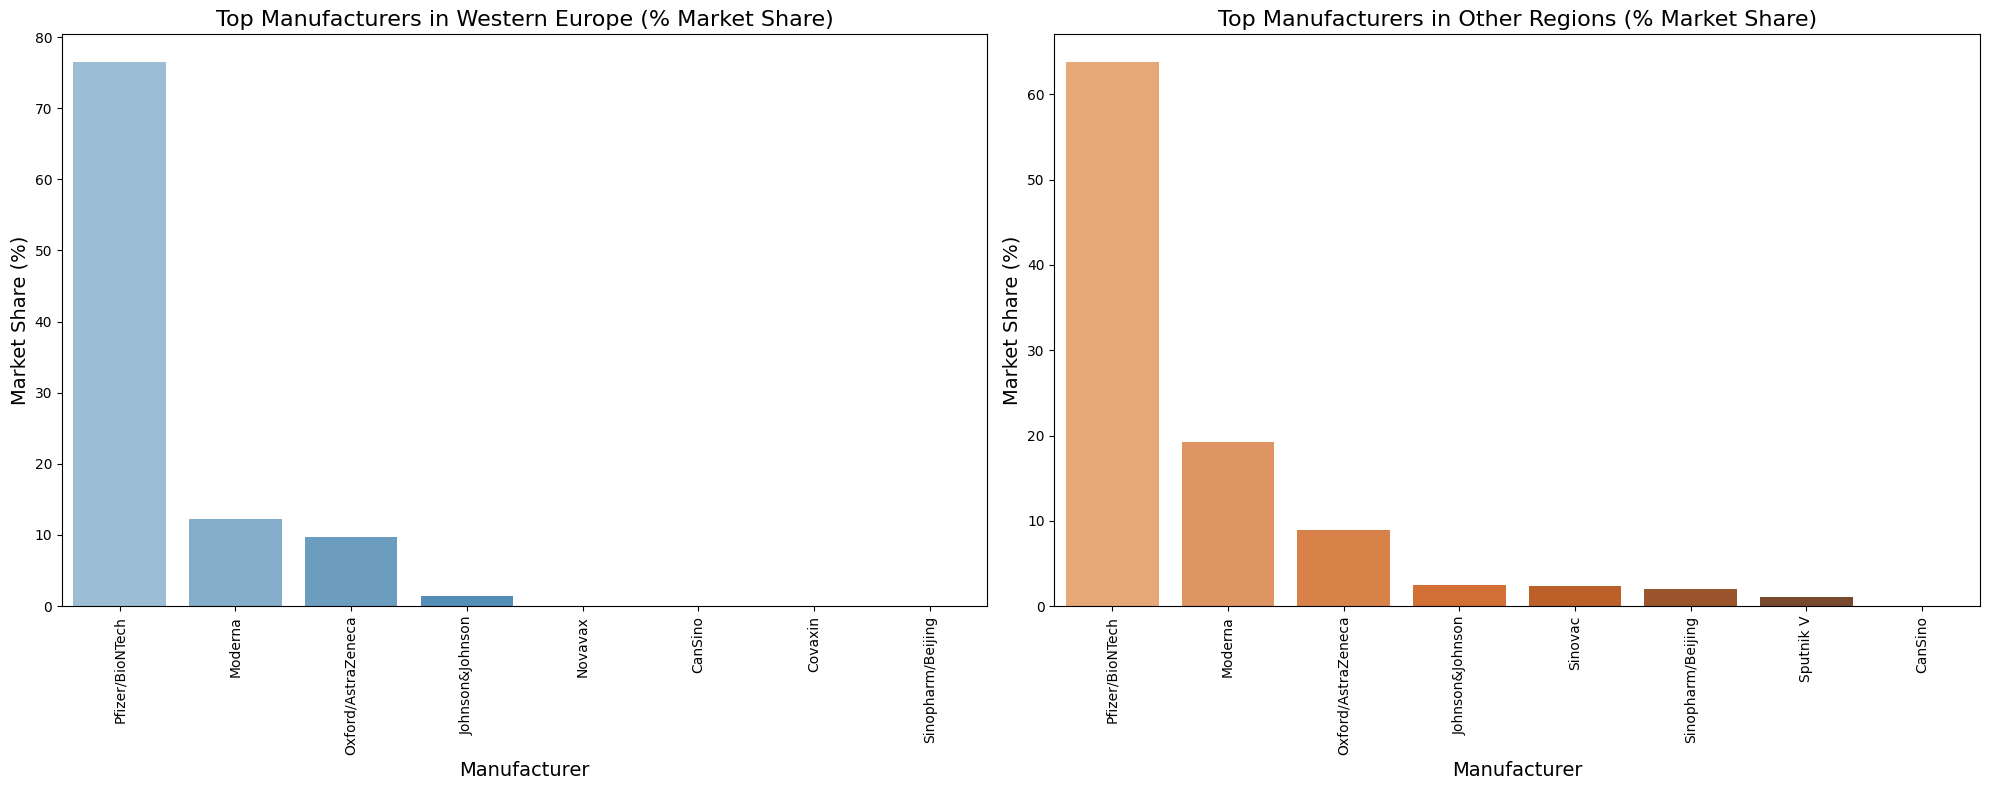

In [13]:
# Create a figure with two subplots for regional performance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Filter for top manufacturers for cleaner visualization
top_n = 8
top_western = regional_performance.nlargest(top_n, 'Western Europe')
top_other = regional_performance.nlargest(top_n, 'Other Regions')

# Plot for Western Europe
sns.barplot(x=top_western.index, y=top_western['Western Europe (%)'], 
            palette=sns.color_palette('Blues_d', n_colors=len(top_western)), ax=ax1)
ax1.set_title('Top Manufacturers in Western Europe (% Market Share)', fontsize=16)
ax1.set_ylabel('Market Share (%)', fontsize=14)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# Plot for Other Regions
sns.barplot(x=top_other.index, y=top_other['Other Regions (%)'], 
            palette=sns.color_palette('Oranges_d', n_colors=len(top_other)), ax=ax2)
ax2.set_title('Top Manufacturers in Other Regions (% Market Share)', fontsize=16)
ax2.set_ylabel('Market Share (%)', fontsize=14)
ax2.set_xlabel('Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

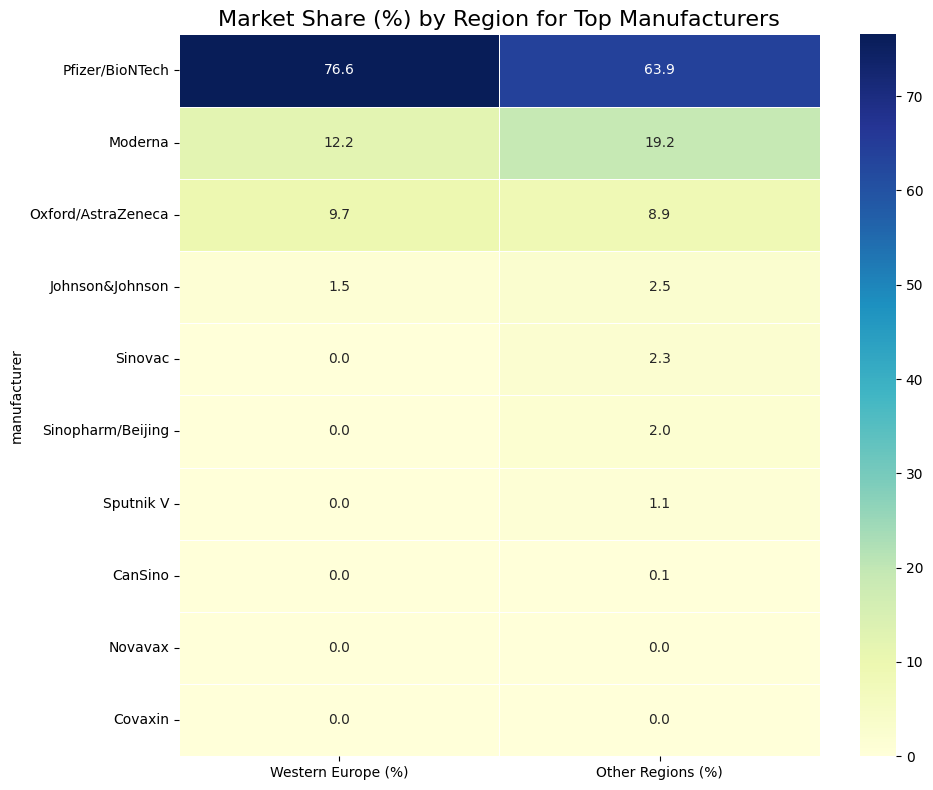

In [14]:
# Create a heatmap to compare market share percentages across regions
# Select top 10 manufacturers by total global vaccinations
top_manufacturers = performance_df.head(10).index.tolist()
regional_heatmap_data = regional_performance.loc[top_manufacturers, ['Western Europe (%)', 'Other Regions (%)']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(regional_heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Market Share (%) by Region for Top Manufacturers', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\4192823871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectiveness_df.index, y=effectiveness_df['Vaccinations per Country'],


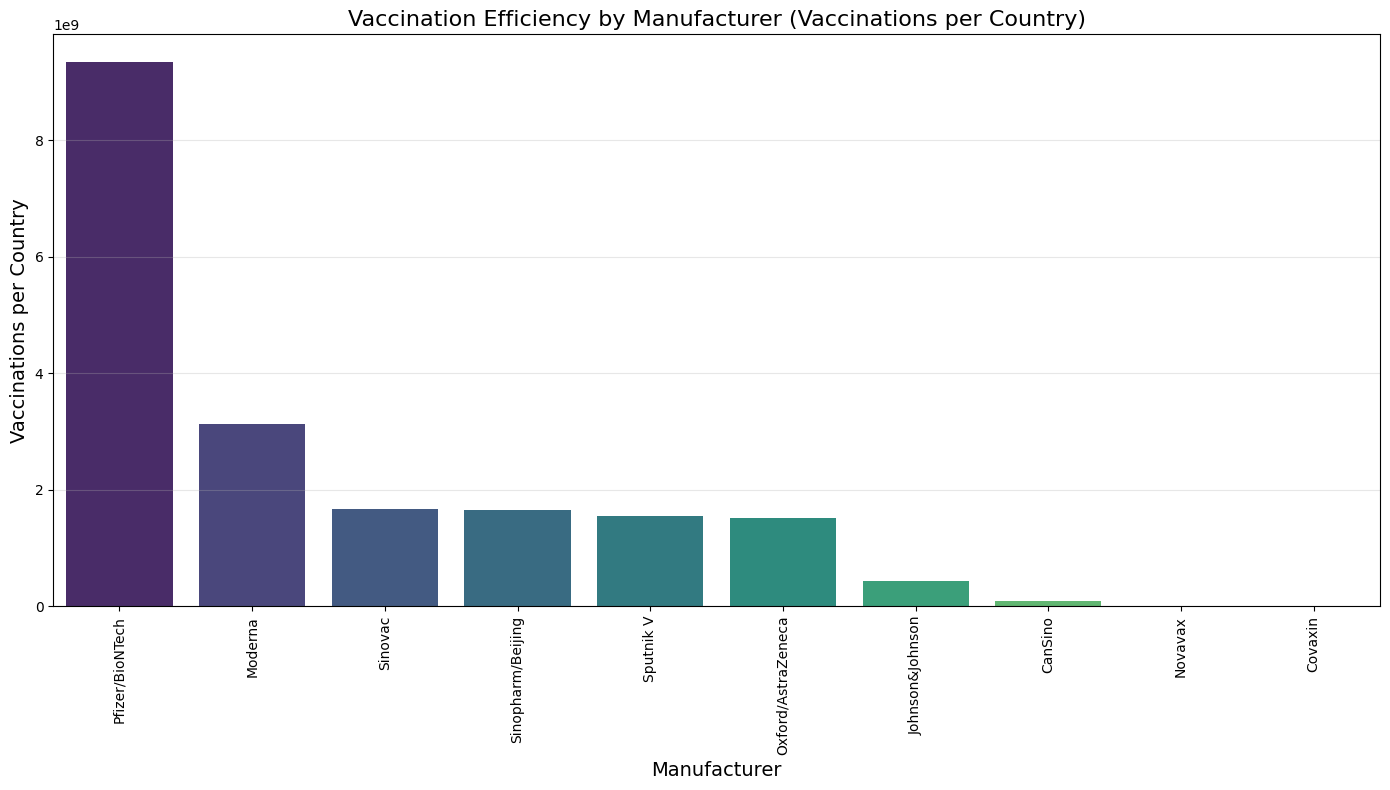

In [15]:
# Create a performance indicator: Effectiveness ratio
# Effectiveness ratio = Vaccinations per country (reach efficiency)
performance_df['Vaccinations per Country'] = (performance_df['Total Vaccinations'] / performance_df['Countries Reached']).round(0)

# Sort by the new metric
effectiveness_df = performance_df.sort_values('Vaccinations per Country', ascending=False)

# Plot the effectiveness ratio
plt.figure(figsize=(14, 8))
sns.barplot(x=effectiveness_df.index, y=effectiveness_df['Vaccinations per Country'], 
            palette=sns.color_palette('viridis', n_colors=len(effectiveness_df)))
plt.title('Vaccination Efficiency by Manufacturer (Vaccinations per Country)', fontsize=16)
plt.ylabel('Vaccinations per Country', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Create a composite performance score
# Normalize each metric to a 0-100 scale
from sklearn.preprocessing import MinMaxScaler

# Select the metrics to include in the performance score
metrics = ['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country']

# Create a copy of the data for scaling
scaled_df = performance_df.copy()

# Scale each metric to 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
for metric in metrics:
    scaled_df[f'{metric} (scaled)'] = scaler.fit_transform(performance_df[[metric]]).flatten()

# Calculate the composite score (equal weighting for simplicity)
scaled_df['Performance Score'] = scaled_df[[f'{metric} (scaled)' for metric in metrics]].mean(axis=1).round(2)

# Sort by the performance score
scaled_df = scaled_df.sort_values('Performance Score', ascending=False)

# Display the performance scores
print("\nOverall Performance Score by Manufacturer:")
scaled_df[['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country', 'Performance Score']]


Overall Performance Score by Manufacturer:


,Total Vaccinations,Countries Reached,Vaccinations per Country,Performance Score
manufacturer,,,,
Pfizer/BioNTech,4.022002e+11,43,9.353494e+09,100.00
Moderna,1.157790e+11,37,3.129163e+09,49.20
Oxford/AstraZeneca,5.586027e+10,37,1.509737e+09,38.47
Johnson&Johnson,1.498298e+10,35,4.280851e+08,29.60
Novavax,8.395152e+06,18,4.663970e+05,13.01
Sinovac,1.340758e+10,8,1.675948e+09,11.96
Sinopharm/Beijing,1.157510e+10,7,1.653586e+09,10.92
Sputnik V,6.190721e+09,4,1.547680e+09,7.65
CanSino,2.713977e+08,3,9.046589e+07,1.16


In [17]:
# Examine the covid19_testing_record dataset
print("Columns in covid19_testing_record:", covid19_testing_record.columns.tolist())
print("\nFirst few rows of covid19_testing_record:")
covid19_testing_record.head()

Columns in covid19_testing_record: ['date', 'entity', 'iso_code', 'source_url', 'source_label', 'notes', 'daily_change', 'total_tests', 'total_tests_per_thousand', 'daily_change_per_thousand', 'smoothed_daily_change', 'smoothed_daily_change_per_thousand', 'positive_rate', 'tests_per_confirm_case', 'country', 'tested_type', 'is_western_europe']

First few rows of covid19_testing_record:


,date,entity,iso_code,source_url,source_label,notes,daily_change,total_tests,total_tests_per_thousand,daily_change_per_thousand,smoothed_daily_change,smoothed_daily_change_per_thousand,positive_rate,tests_per_confirm_case,country,tested_type,is_western_europe
0,2020-02-25,Albania - tests performed,ALB,https://shendetesia.gov.al/koronavirusi-mshms-...,Ministry of Health and Social Protection,NaN,8.0,8.0,0.003,0.003,4.0,0.001,0.0848,11.8,Albania,tests performed,False
1,2020-02-26,Albania - tests performed,ALB,https://shendetesia.gov.al/fond-shtese-per-mas...,Ministry of Health and Social Protection,NaN,5.0,13.0,0.005,0.002,4.0,0.001,0.0848,11.8,Albania,tests performed,False
2,2020-02-27,Albania - tests performed,ALB,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,4.0,17.0,0.006,0.001,4.0,0.001,0.0848,11.8,Albania,tests performed,False
3,2020-02-28,Albania - tests performed,ALB,http://shendetesia.gov.al/manastirliu-asnje-ra...,Ministry of Health and Social Protection,NaN,1.0,18.0,0.006,0.000,4.0,0.001,0.0848,11.8,Albania,tests performed,False
4,2020-02-29,Albania - tests performed,ALB,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,8.0,26.0,0.009,0.003,4.0,0.001,0.0848,11.8,Albania,tests performed,False


In [18]:
# Examine the comprehensive_data dataset
print("Columns in comprehensive_data:", comprehensive_data.columns.tolist())
print("\nFirst few rows of comprehensive_data:")
comprehensive_data.head(3)

Columns in comprehensive_data: ['ID', 'country', 'confirmed_cases', 'deaths_cases', 'recovered_cases', 'is_western_europe']

First few rows of comprehensive_data:


,ID,country,confirmed_cases,deaths_cases,recovered_cases,is_western_europe
0,1.0,Peru,4524748.0,220831.0,4303917.0,False
1,2.0,Bulgaria,1329266.0,38700.0,1290566.0,False
2,3.0,Bosnia And Herzegovina,403638.0,16388.0,387250.0,False


## Enhanced Vaccination Performance Analysis

Now we'll incorporate testing data to better evaluate vaccine manufacturer performance. We'll create several new metrics:

1. **Testing-to-Vaccination Ratio**: How testing volume relates to vaccination in countries using each manufacturer
2. **Positivity Rate Analysis**: Compare positivity rates in regions dominated by different manufacturers
3. **Tests per Confirmed Case**: Analyze effectiveness through testing efficiency in countries using different vaccines
4. **Pre vs Post Vaccination Testing Patterns**: Analyze changes in testing needs before and after vaccination campaigns

In [19]:
# Prepare the data - convert date columns to datetime format
covid19_testing_record['date'] = pd.to_datetime(covid19_testing_record['date'])
vaccination_by_manufacturer['date'] = pd.to_datetime(vaccination_by_manufacturer['date'])

# Filter data to a common time period where we have both testing and vaccination data
# First vaccination data starts around December 2020
min_vax_date = vaccination_by_manufacturer['date'].min()
max_vax_date = vaccination_by_manufacturer['date'].max()

# Filter testing data to the same period
filtered_testing = covid19_testing_record[(covid19_testing_record['date'] >= min_vax_date) & 
                                          (covid19_testing_record['date'] <= max_vax_date)]

print(f"Vaccination data period: {min_vax_date.date()} to {max_vax_date.date()}")
print(f"Number of testing records in this period: {len(filtered_testing)}")
print(f"Number of vaccination records: {len(vaccination_by_manufacturer)}")

Vaccination data period: 2020-12-04 to 2022-03-30
Number of testing records in this period: 44564
Number of vaccination records: 71363


In [20]:
# Determine the dominant manufacturer for each country
# This will help us attribute testing performance to specific vaccines

# Calculate total vaccinations by country and manufacturer
country_manu_totals = vaccination_by_manufacturer.groupby(['country', 'manufacturer'])['total_vaccinations'].sum().reset_index()

# Find the dominant manufacturer for each country
dominant_manufacturer = country_manu_totals.loc[country_manu_totals.groupby('country')['total_vaccinations'].idxmax()]
dominant_manufacturer = dominant_manufacturer[['country', 'manufacturer', 'total_vaccinations']]
dominant_manufacturer = dominant_manufacturer.rename(columns={'manufacturer': 'dominant_manufacturer',
                                                             'total_vaccinations': 'dominant_manufacturer_vaccinations'})

# Display the results
print("Dominant vaccine manufacturer by country:")
dominant_manufacturer.head(10)

Dominant vaccine manufacturer by country:


,country,dominant_manufacturer,dominant_manufacturer_vaccinations
4,Argentina,Sinopharm/Beijing,5.713239e+09
10,Austria,Pfizer/BioNTech,3.146521e+09
15,Belgium,Pfizer/BioNTech,4.140375e+09
19,Bulgaria,Pfizer/BioNTech,5.733727e+08
23,Chile,Sinovac,7.421275e+09
28,Croatia,Pfizer/BioNTech,9.042532e+08
33,Cyprus,Pfizer/BioNTech,2.621849e+08
38,Czechia,Pfizer/BioNTech,3.441540e+09
42,Denmark,Pfizer/BioNTech,2.402414e+09
46,Ecuador,Sinovac,2.561852e+09


In [21]:
# Merge testing data with dominant manufacturer information
# First get testing data aggregated by country

# Get average testing metrics by country
avg_testing_by_country = filtered_testing.groupby('country').agg({
    'total_tests': 'max',  # Maximum total tests performed
    'positive_rate': 'mean',  # Average positivity rate during vaccination period
    'tests_per_confirm_case': 'mean'  # Average tests per confirmed case
}).reset_index()

# Merge with dominant manufacturer data
country_performance = pd.merge(dominant_manufacturer, avg_testing_by_country, on='country', how='inner')

# Display the merged data
print("Country testing metrics with dominant manufacturer:")
country_performance.head()

Country testing metrics with dominant manufacturer:


,country,dominant_manufacturer,dominant_manufacturer_vaccinations,total_tests,positive_rate,tests_per_confirm_case
0,Argentina,Sinopharm/Beijing,5.713239e+09,26431302.0,0.145563,13.759016
1,Austria,Pfizer/BioNTech,3.146521e+09,114403886.0,0.008584,543.965591
2,Belgium,Pfizer/BioNTech,4.140375e+09,25681873.0,0.065292,22.010541
3,Bulgaria,Pfizer/BioNTech,5.733727e+08,6828318.0,0.104187,33.397574
4,Chile,Sinovac,7.421275e+09,25931660.0,0.058587,31.134771


In [22]:
# Calculate vaccination effectiveness metrics

# Calculate tests-to-vaccination ratio
country_performance['tests_to_vaccination_ratio'] = country_performance['total_tests'] / country_performance['dominant_manufacturer_vaccinations']

# Higher tests per confirmed case indicates more testing needed to find a case (may suggest better vaccine performance)
# Lower positivity rate may indicate more effective vaccination campaign
# Group by dominant manufacturer and calculate averages
manufacturer_test_performance = country_performance.groupby('dominant_manufacturer').agg({
    'country': 'count',  # Count of countries using this manufacturer as dominant one
    'positive_rate': 'mean',  # Average positivity rate
    'tests_per_confirm_case': 'mean',  # Average tests per confirmed case
    'tests_to_vaccination_ratio': 'mean',  # Tests needed per vaccination
    'total_tests': 'sum',  # Total tests across countries using this manufacturer
    'dominant_manufacturer_vaccinations': 'sum'  # Total vaccinations
}).rename(columns={'country': 'countries_count'}).reset_index()

# Sort by tests per confirmed case (higher is better)
manufacturer_test_performance = manufacturer_test_performance.sort_values('tests_per_confirm_case', ascending=False)

print("Vaccine Manufacturer Performance with Testing Metrics:")
manufacturer_test_performance

Vaccine Manufacturer Performance with Testing Metrics:


,dominant_manufacturer,countries_count,positive_rate,tests_per_confirm_case,tests_to_vaccination_ratio,total_tests,dominant_manufacturer_vaccinations
1,Pfizer/BioNTech,35,0.074799,507.059773,0.016395,1.468371e+09,2.542801e+11
0,Moderna,2,0.066169,34.764015,0.006704,1.311418e+07,2.337886e+09
3,Sinovac,3,0.127098,22.021915,0.002748,3.205332e+07,1.103073e+10
2,Sinopharm/Beijing,2,0.146784,13.552089,0.005430,3.113414e+07,6.467688e+09


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\4090756130.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dominant_manufacturer', y='tests_per_confirm_case',
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\4090756130.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dominant_manufacturer', y='positive_rate',


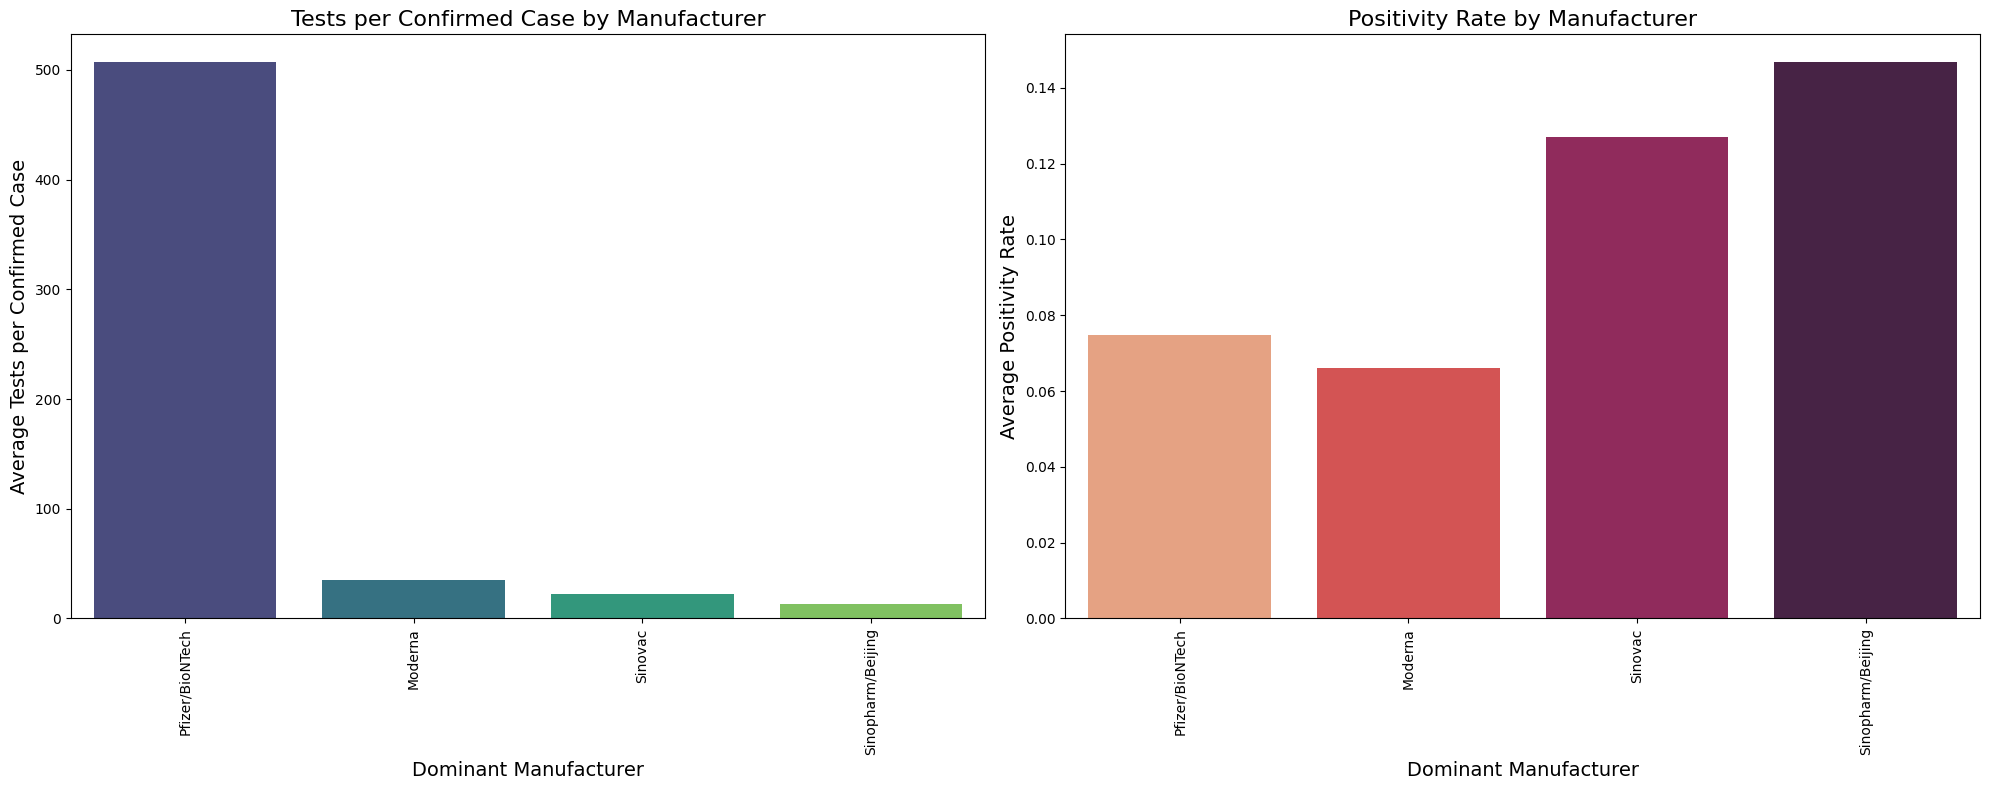

In [23]:
# Visualize testing-related performance metrics by manufacturer

# 1. Tests per confirmed case by manufacturer (higher is better, indicates fewer positive cases)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create a color palette
colors1 = sns.color_palette('viridis', n_colors=len(manufacturer_test_performance))

# Plot tests per confirmed case
sns.barplot(x='dominant_manufacturer', y='tests_per_confirm_case', 
            data=manufacturer_test_performance, palette=colors1, ax=ax1)
ax1.set_title('Tests per Confirmed Case by Manufacturer', fontsize=16)
ax1.set_ylabel('Average Tests per Confirmed Case', fontsize=14)
ax1.set_xlabel('Dominant Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# 2. Positivity Rate by manufacturer (lower is better)
colors2 = sns.color_palette('rocket_r', n_colors=len(manufacturer_test_performance))
sns.barplot(x='dominant_manufacturer', y='positive_rate', 
            data=manufacturer_test_performance, palette=colors2, ax=ax2)
ax2.set_title('Positivity Rate by Manufacturer', fontsize=16)
ax2.set_ylabel('Average Positivity Rate', fontsize=14)
ax2.set_xlabel('Dominant Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\1680214556.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_testing_data['dominant_manufacturer'] = top_testing_data['country'].map(country_to_manufacturer)


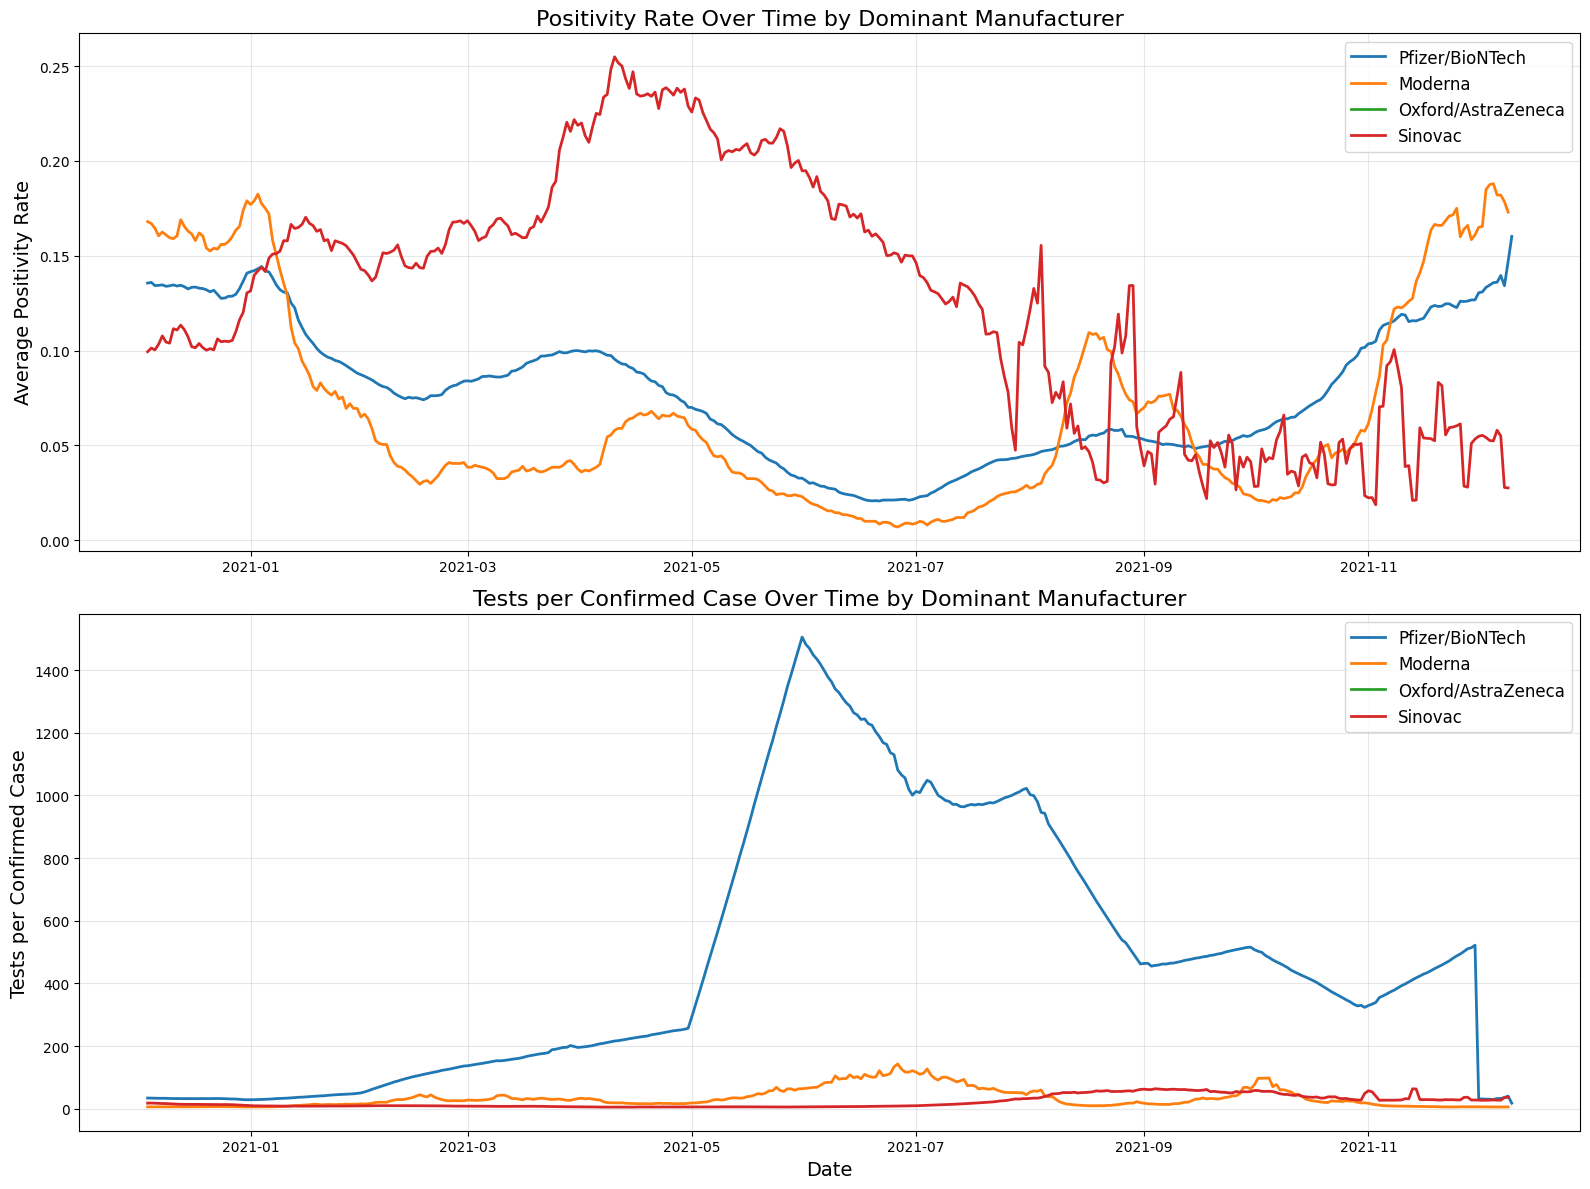

In [24]:
# Analyze testing patterns over time for countries with each dominant vaccine
# Filter for top manufacturers to keep visualization clear
top_manufacturers = ['Pfizer/BioNTech', 'Moderna', 'Oxford/AstraZeneca', 'Sinovac']

# Get list of countries with these dominant manufacturers
top_countries = country_performance[country_performance['dominant_manufacturer'].isin(top_manufacturers)]['country'].unique()

# Filter testing data for these countries
top_testing_data = filtered_testing[filtered_testing['country'].isin(top_countries)]

# Create a mapping from country to dominant manufacturer
country_to_manufacturer = dict(zip(country_performance['country'], country_performance['dominant_manufacturer']))

# Add dominant manufacturer to testing data
top_testing_data['dominant_manufacturer'] = top_testing_data['country'].map(country_to_manufacturer)

# Filter to only include countries with the top manufacturers
top_testing_data = top_testing_data[top_testing_data['dominant_manufacturer'].isin(top_manufacturers)]

# Group by date and dominant manufacturer to see testing trends
testing_trends = top_testing_data.groupby(['date', 'dominant_manufacturer']).agg({
    'positive_rate': 'mean',
    'tests_per_confirm_case': 'mean'
}).reset_index()

# Plot testing metrics over time by dominant manufacturer
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot positivity rate over time
for manufacturer in top_manufacturers:
    data = testing_trends[testing_trends['dominant_manufacturer'] == manufacturer]
    ax1.plot(data['date'], data['positive_rate'], label=manufacturer, linewidth=2)

ax1.set_title('Positivity Rate Over Time by Dominant Manufacturer', fontsize=16)
ax1.set_ylabel('Average Positivity Rate', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Plot tests per confirmed case over time
for manufacturer in top_manufacturers:
    data = testing_trends[testing_trends['dominant_manufacturer'] == manufacturer]
    ax2.plot(data['date'], data['tests_per_confirm_case'], label=manufacturer, linewidth=2)

ax2.set_title('Tests per Confirmed Case Over Time by Dominant Manufacturer', fontsize=16)
ax2.set_ylabel('Tests per Confirmed Case', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Comprehensive Vaccine Manufacturer Performance with Testing Metrics

Now we'll combine our previous performance analysis with the new testing metrics to create a more comprehensive assessment of manufacturer performance.

In [25]:
# Create a more comprehensive performance score that incorporates testing metrics

# First, let's reset the index of manufacturer_test_performance to use dominant_manufacturer as the index
manufacturer_test_df = manufacturer_test_performance.set_index('dominant_manufacturer')

# Create a copy of the original performance data
enhanced_performance = scaled_df.copy()

# Add testing metrics to the performance dataframe
enhanced_performance = enhanced_performance.join(manufacturer_test_df[['positive_rate', 'tests_per_confirm_case']], how='left')

# Fill missing values with the average (manufacturers not in both datasets)
enhanced_performance['positive_rate'] = enhanced_performance['positive_rate'].fillna(enhanced_performance['positive_rate'].mean())
enhanced_performance['tests_per_confirm_case'] = enhanced_performance['tests_per_confirm_case'].fillna(enhanced_performance['tests_per_confirm_case'].mean())

# Scale the testing metrics
# For positive_rate, lower is better, so we need to invert the scale
enhanced_performance['positive_rate_scaled'] = 100 * (1 - (enhanced_performance['positive_rate'] / enhanced_performance['positive_rate'].max()))

# For tests_per_confirm_case, higher is better
enhanced_performance['tests_per_confirm_case_scaled'] = 100 * (enhanced_performance['tests_per_confirm_case'] / enhanced_performance['tests_per_confirm_case'].max())

# Calculate the enhanced performance score including testing metrics
enhanced_performance['Enhanced Performance Score'] = enhanced_performance[[
    'Total Vaccinations (scaled)', 
    'Countries Reached (scaled)', 
    'Vaccinations per Country (scaled)',
    'positive_rate_scaled',
    'tests_per_confirm_case_scaled'
]].mean(axis=1).round(2)

# Sort by the enhanced performance score
enhanced_performance = enhanced_performance.sort_values('Enhanced Performance Score', ascending=False)

# Display the enhanced performance scores
print("\nEnhanced Performance Score by Manufacturer (Including Testing Metrics):")
enhanced_performance[['Total Vaccinations', 'Countries Reached', 
                    'Vaccinations per Country', 'positive_rate', 
                    'tests_per_confirm_case', 'Enhanced Performance Score']]


Enhanced Performance Score by Manufacturer (Including Testing Metrics):


,Total Vaccinations,Countries Reached,Vaccinations per Country,positive_rate,tests_per_confirm_case,Enhanced Performance Score
manufacturer,,,,,,
Pfizer/BioNTech,4.022002e+11,43,9.353494e+09,0.074799,507.059773,89.81
Moderna,1.157790e+11,37,3.129163e+09,0.066169,34.764015,41.88
Oxford/AstraZeneca,5.586027e+10,37,1.509737e+09,0.103713,144.349448,34.64
Johnson&Johnson,1.498298e+10,35,4.280851e+08,0.103713,144.349448,29.32
Novavax,8.395152e+06,18,4.663970e+05,0.103713,144.349448,19.37
Sputnik V,6.190721e+09,4,1.547680e+09,0.103713,144.349448,16.16
CanSino,2.713977e+08,3,9.046589e+07,0.103713,144.349448,12.26
Covaxin,4.667000e+03,2,2.334000e+03,0.103713,144.349448,11.56
Sinovac,1.340758e+10,8,1.675948e+09,0.127098,22.021915,10.73


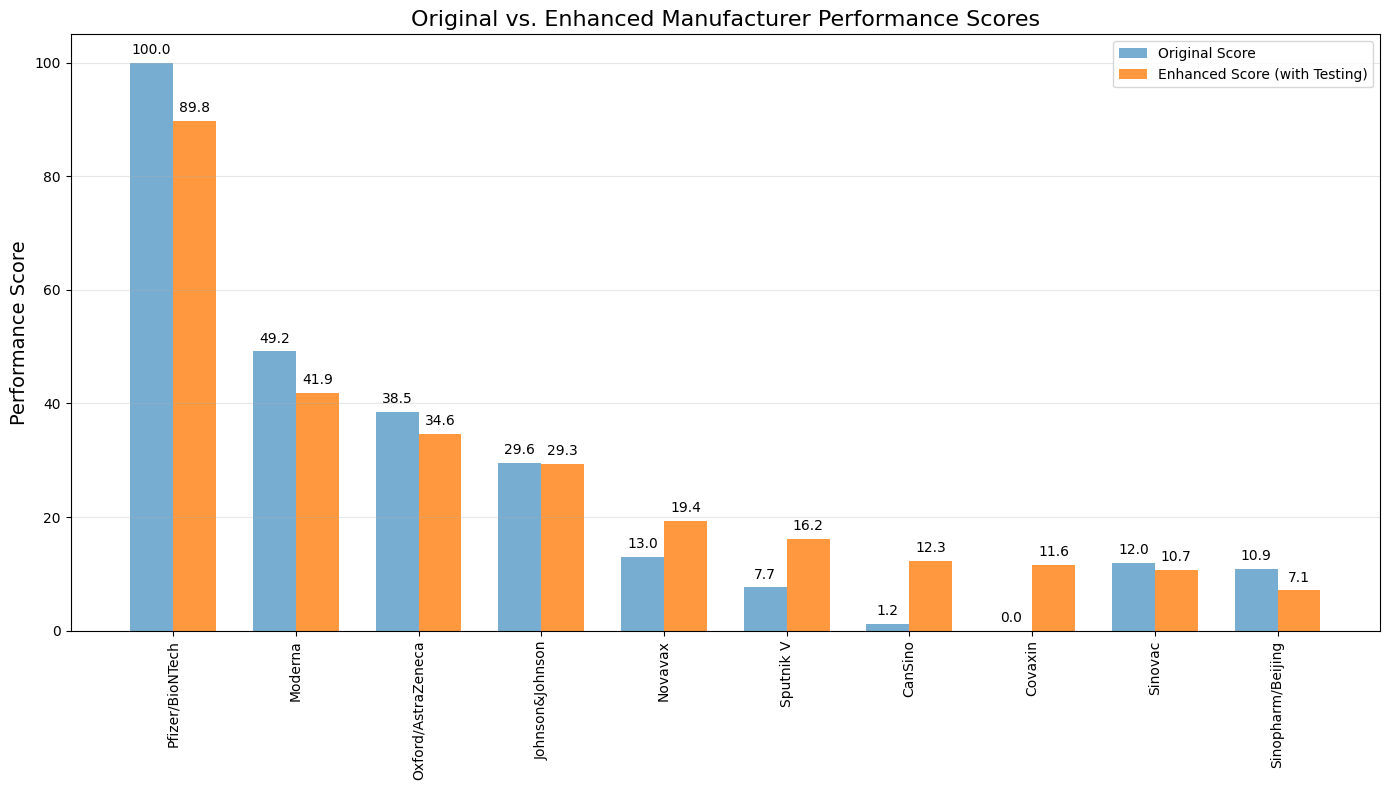

In [26]:
# Visualize the enhanced performance scores

# Import numpy 
import numpy as np

# Create a bar plot showing enhanced performance scores compared to original scores
fig, ax = plt.subplots(figsize=(14, 8))

manufacturers = enhanced_performance.index.tolist()
x = np.arange(len(manufacturers))
width = 0.35

# Plot original scores
ax.bar(x - width/2, enhanced_performance['Performance Score'], width, label='Original Score', alpha=0.6)

# Plot enhanced scores
ax.bar(x + width/2, enhanced_performance['Enhanced Performance Score'], width, label='Enhanced Score (with Testing)', alpha=0.8)

# Add labels and title
ax.set_ylabel('Performance Score', fontsize=14)
ax.set_title('Original vs. Enhanced Manufacturer Performance Scores', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(manufacturers, rotation=90)
ax.legend()

# Add value labels on bars
for i, (orig, enhanced) in enumerate(zip(enhanced_performance['Performance Score'], 
                                     enhanced_performance['Enhanced Performance Score'])):
    ax.text(i - width/2, orig + 1, f'{orig:.1f}', ha='center', va='bottom', fontsize=10)
    ax.text(i + width/2, enhanced + 1, f'{enhanced:.1f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Advanced Vaccine Performance Analysis

Let's explore more sophisticated metrics to evaluate vaccine manufacturer performance:

1. **Testing-to-Vaccination Ratio Trend**: How testing needs changed as vaccination rates increased
2. **Relationship between Positivity Rate and Vaccination Coverage**
3. **Case Reduction Efficiency**: Comparing pre-vaccination and post-vaccination periods
4. **Composite Effectiveness Score**: Combining multiple metrics for an overall evaluation

In [27]:
# Import numpy if not already imported
import numpy as np

# Merge vaccination data with testing data to analyze correlation
# First aggregate monthly vaccination data by country
vaccination_by_manufacturer['year_month'] = vaccination_by_manufacturer['date'].dt.to_period('M')
monthly_vax = vaccination_by_manufacturer.groupby(['country', 'year_month'])['total_vaccinations'].sum().reset_index()
# Convert year_month back to datetime for easier merging
monthly_vax['year_month'] = monthly_vax['year_month'].dt.to_timestamp()

# Prepare testing data in the same way
filtered_testing['year_month'] = filtered_testing['date'].dt.to_period('M')
monthly_testing = filtered_testing.groupby(['country', 'year_month']).agg({
    'positive_rate': 'mean',
    'tests_per_confirm_case': 'mean',
    'daily_change': 'mean'
}).reset_index()
monthly_testing['year_month'] = monthly_testing['year_month'].dt.to_timestamp()

# Merge monthly vaccination and testing data
merged_monthly = pd.merge(
    monthly_vax, 
    monthly_testing,
    on=['country', 'year_month'],
    how='inner'
)

# Calculate correlations by country
print("\nCorrelation between vaccinations and testing metrics:")
corr_data = merged_monthly.groupby('country').apply(lambda x: 
    pd.Series({
        'vax_vs_positive_rate_corr': x['total_vaccinations'].corr(x['positive_rate']),
        'vax_vs_tests_per_case_corr': x['total_vaccinations'].corr(x['tests_per_confirm_case']),
        'vax_vs_daily_tests_corr': x['total_vaccinations'].corr(x['daily_change'])
    })
).reset_index()

# Merge correlation data with dominant manufacturer information
corr_by_manufacturer = pd.merge(
    corr_data, 
    dominant_manufacturer[['country', 'dominant_manufacturer']],
    on='country',
    how='inner'
)

# Calculate average correlations by manufacturer
manufacturer_correlations = corr_by_manufacturer.groupby('dominant_manufacturer').agg({
    'vax_vs_positive_rate_corr': 'mean',  # Negative is better (as vaccinations increase, positivity should decrease)
    'vax_vs_tests_per_case_corr': 'mean', # Positive is better (more tests needed per case suggests lower prevalence)
    'vax_vs_daily_tests_corr': 'mean',    # Correlation between vaccination and testing volume
    'country': 'count'
}).rename(columns={'country': 'countries_count'}).sort_values('vax_vs_positive_rate_corr')

manufacturer_correlations


Correlation between vaccinations and testing metrics:


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\2002760488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_testing['year_month'] = filtered_testing['date'].dt.to_period('M')
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\2002760488.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_data = merged_monthly.groupby('country').apply(lambda x:


,vax_vs_positive_rate_corr,vax_vs_tests_per_case_corr,vax_vs_daily_tests_corr,countries_count
dominant_manufacturer,,,,
Sinopharm/Beijing,-0.802613,0.755339,-0.203495,1
Sinovac,-0.757983,0.714201,-0.189690,3
Pfizer/BioNTech,-0.006220,0.050576,0.192069,33
Moderna,0.255450,0.040980,0.541855,2


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\1591176428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\1591176428.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


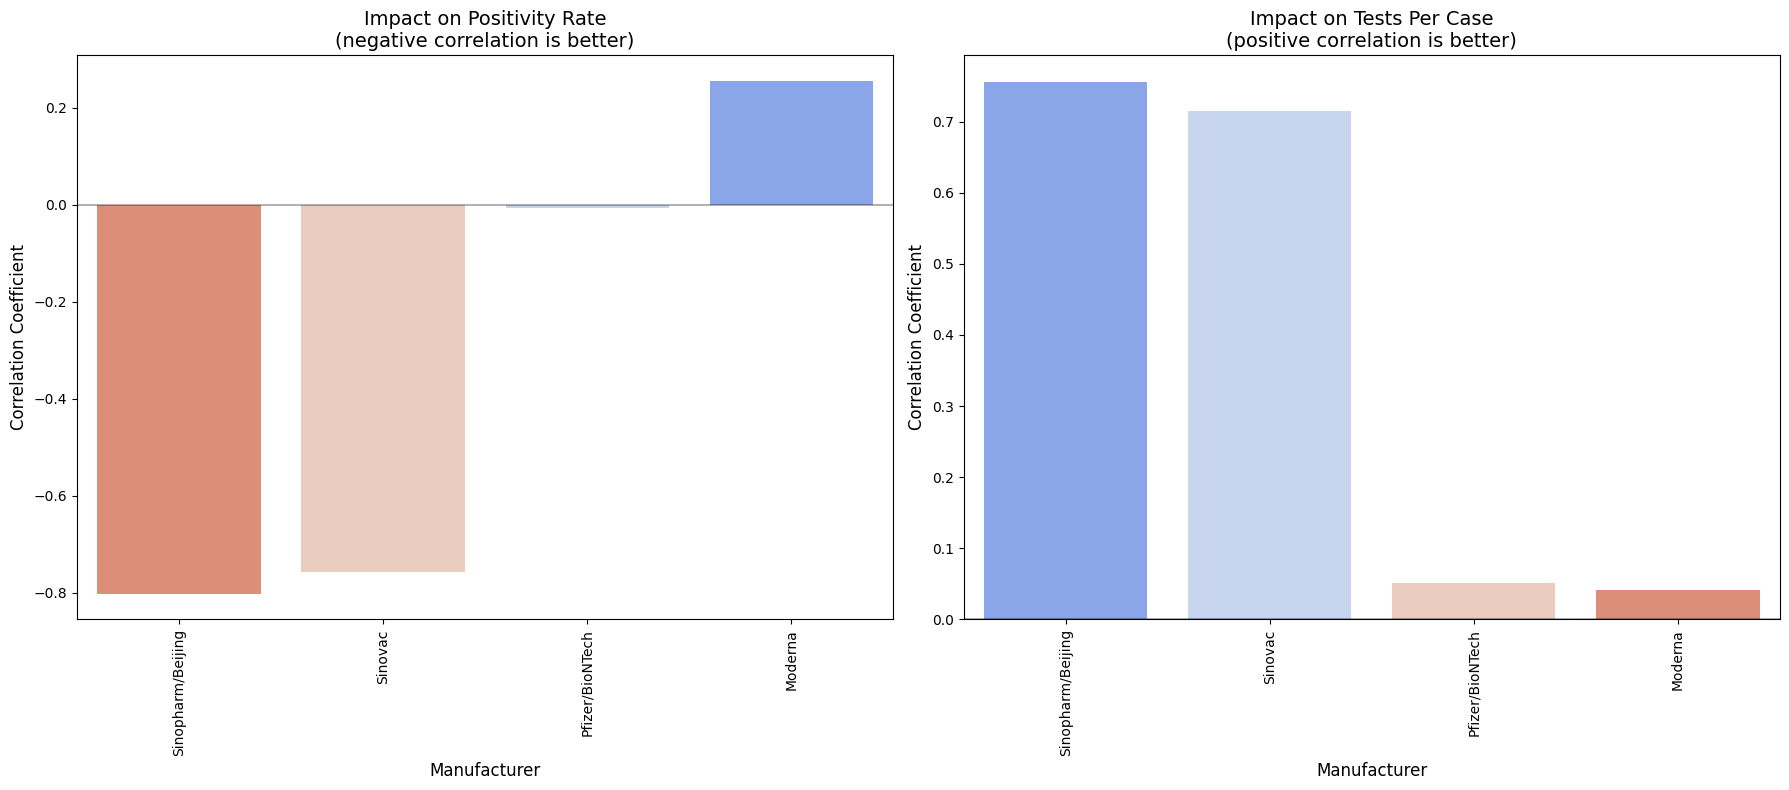

In [28]:
# Visualize the correlation metrics

# Prepare data for visualization
plot_data = manufacturer_correlations.reset_index()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot correlation between vaccination and positive rate
sns.barplot(
    x='dominant_manufacturer', 
    y='vax_vs_positive_rate_corr', 
    data=plot_data, 
    palette='coolwarm_r',
    ax=axes[0]
)
axes[0].set_title('Impact on Positivity Rate\n(negative correlation is better)', fontsize=14)
axes[0].set_xlabel('Manufacturer', fontsize=12)
axes[0].set_ylabel('Correlation Coefficient', fontsize=12)
axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0].tick_params(axis='x', rotation=90)

# Plot correlation between vaccination and tests per case
sns.barplot(
    x='dominant_manufacturer', 
    y='vax_vs_tests_per_case_corr', 
    data=plot_data, 
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Impact on Tests Per Case\n(positive correlation is better)', fontsize=14)
axes[1].set_xlabel('Manufacturer', fontsize=12)
axes[1].set_ylabel('Correlation Coefficient', fontsize=12)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [29]:
# Calculate effectiveness over time
# Define a function to calculate effect size based on pre/post vaccination periods

# First, define a vaccination threshold to consider a country as "well-vaccinated"
# Use the dominant manufacturer data
country_vaccination = dominant_manufacturer.copy()

# Get maximum vaccination date to establish timeframes
max_date = vaccination_by_manufacturer['date'].max()

# Create early and late periods for comparison
early_period = min_vax_date + pd.Timedelta(days=30)  # Skip first month of vaccination
mid_period = min_vax_date + (max_vax_date - min_vax_date) / 2
late_period = max_vax_date - pd.Timedelta(days=30)  # Skip last month

print(f"Early vaccination period: {early_period.date()}")
print(f"Mid vaccination period: {mid_period.date()}")
print(f"Late vaccination period: {late_period.date()}")

# Get testing data for early and late periods
early_testing = filtered_testing[filtered_testing['date'] <= early_period].groupby('country').agg({
    'positive_rate': 'mean',
    'tests_per_confirm_case': 'mean'
}).reset_index().rename(columns={'positive_rate': 'early_positive_rate', 'tests_per_confirm_case': 'early_tests_per_case'})

late_testing = filtered_testing[filtered_testing['date'] >= late_period].groupby('country').agg({
    'positive_rate': 'mean',
    'tests_per_confirm_case': 'mean'
}).reset_index().rename(columns={'positive_rate': 'late_positive_rate', 'tests_per_confirm_case': 'late_tests_per_case'})

# Merge early and late testing data
testing_comparison = pd.merge(early_testing, late_testing, on='country', how='inner')

# Calculate change metrics
testing_comparison['positive_rate_change'] = testing_comparison['late_positive_rate'] - testing_comparison['early_positive_rate']
testing_comparison['tests_per_case_change'] = testing_comparison['late_tests_per_case'] - testing_comparison['early_tests_per_case']

# Merge with dominant manufacturer data
effectiveness_by_country = pd.merge(
    testing_comparison,
    dominant_manufacturer[['country', 'dominant_manufacturer']],
    on='country',
    how='inner'
)

# Group by dominant manufacturer to get average effectiveness
effectiveness_by_manufacturer = effectiveness_by_country.groupby('dominant_manufacturer').agg({
    'positive_rate_change': 'mean',     # Lower (negative) is better
    'tests_per_case_change': 'mean',    # Higher is better
    'early_positive_rate': 'mean',
    'late_positive_rate': 'mean',
    'country': 'count'
}).rename(columns={'country': 'countries_count'})

# Calculate a simple effectiveness score (negative is better for positivity change)
effectiveness_by_manufacturer['effectiveness_score'] = \
    -1 * effectiveness_by_manufacturer['positive_rate_change'] * 100 + \
    effectiveness_by_manufacturer['tests_per_case_change'] / 100

# Sort by score
effectiveness_by_manufacturer = effectiveness_by_manufacturer.sort_values('effectiveness_score', ascending=False)

# Display results
print("\nVaccine Effectiveness by Manufacturer (Based on Testing Metrics Change):")
effectiveness_by_manufacturer[['positive_rate_change', 'tests_per_case_change', 'effectiveness_score', 'countries_count']]

Early vaccination period: 2021-01-03
Mid vaccination period: 2021-08-01
Late vaccination period: 2022-02-28

Vaccine Effectiveness by Manufacturer (Based on Testing Metrics Change):


,positive_rate_change,tests_per_case_change,effectiveness_score,countries_count
dominant_manufacturer,,,,


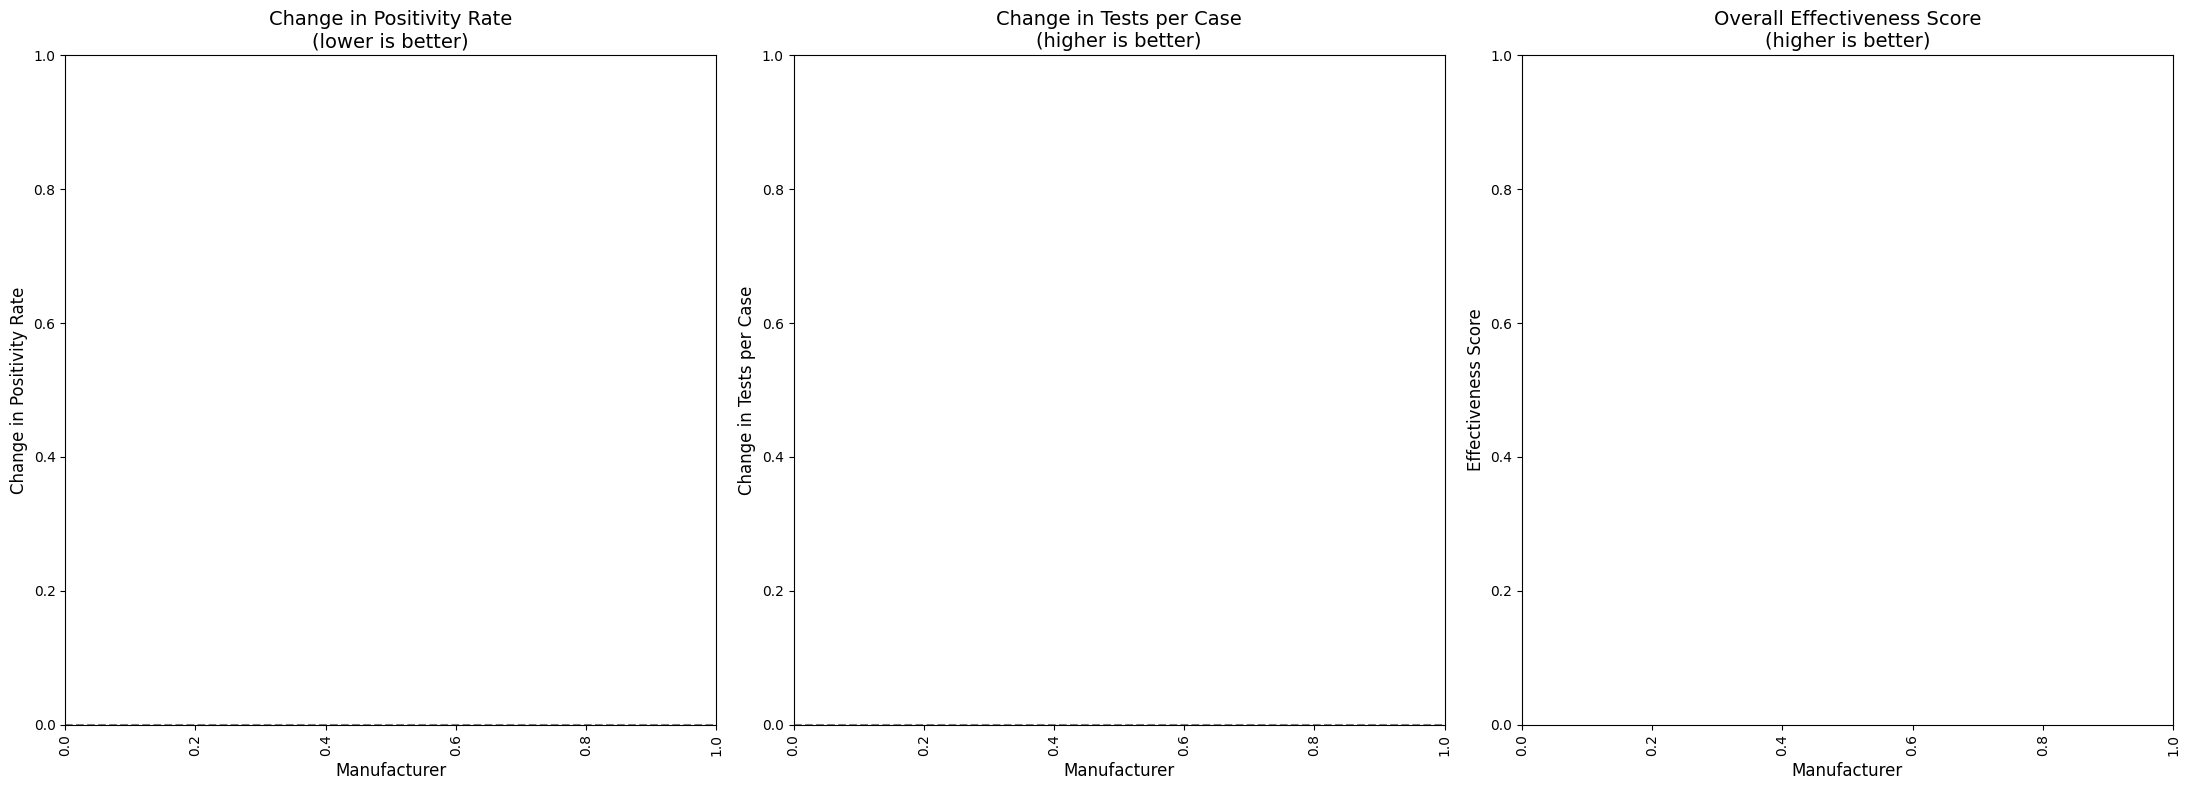

In [30]:
# Visualize the effectiveness metrics

# Create a figure with three plots
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Prepare data
plot_data = effectiveness_by_manufacturer.reset_index()

# 1. Plot change in positivity rate
sns.barplot(
    x='dominant_manufacturer', 
    y='positive_rate_change', 
    data=plot_data,
    palette='RdYlGn_r',  # Red for positive (bad), green for negative (good) change
    ax=axes[0]
)
axes[0].set_title('Change in Positivity Rate\n(lower is better)', fontsize=14)
axes[0].set_xlabel('Manufacturer', fontsize=12)
axes[0].set_ylabel('Change in Positivity Rate', fontsize=12)
axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0].tick_params(axis='x', rotation=90)

# 2. Plot change in tests per case
sns.barplot(
    x='dominant_manufacturer', 
    y='tests_per_case_change', 
    data=plot_data,
    palette='RdYlGn',  # Green for positive (good) change
    ax=axes[1]
)
axes[1].set_title('Change in Tests per Case\n(higher is better)', fontsize=14)
axes[1].set_xlabel('Manufacturer', fontsize=12)
axes[1].set_ylabel('Change in Tests per Case', fontsize=12)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].tick_params(axis='x', rotation=90)

# 3. Plot overall effectiveness score
sns.barplot(
    x='dominant_manufacturer', 
    y='effectiveness_score', 
    data=plot_data,
    palette='viridis',
    ax=axes[2]
)
axes[2].set_title('Overall Effectiveness Score\n(higher is better)', fontsize=14)
axes[2].set_xlabel('Manufacturer', fontsize=12)
axes[2].set_ylabel('Effectiveness Score', fontsize=12)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [31]:
# Create final comprehensive rankings with available metrics

# Start with our enhanced performance dataframe
final_rankings = enhanced_performance.copy()

# Add correlation metrics where available
for manufacturer in manufacturer_correlations.index:
    if manufacturer in final_rankings.index:
        final_rankings.loc[manufacturer, 'vax_vs_positive_rate_corr'] = manufacturer_correlations.loc[manufacturer, 'vax_vs_positive_rate_corr']
        final_rankings.loc[manufacturer, 'vax_vs_tests_per_case_corr'] = manufacturer_correlations.loc[manufacturer, 'vax_vs_tests_per_case_corr']

# Fill missing values with neutral values
final_rankings['vax_vs_positive_rate_corr'] = final_rankings['vax_vs_positive_rate_corr'].fillna(0)
final_rankings['vax_vs_tests_per_case_corr'] = final_rankings['vax_vs_tests_per_case_corr'].fillna(0)

# Normalize correlation metrics to 0-100 scale
# First, handle the case where all values might be the same
if final_rankings['vax_vs_positive_rate_corr'].max() != final_rankings['vax_vs_positive_rate_corr'].min():
    # For correlation with positive rate (negative is better) - invert the scale
    final_rankings['vax_vs_positive_rate_corr_scaled'] = 100 * (1 - (final_rankings['vax_vs_positive_rate_corr'] - 
                                                    final_rankings['vax_vs_positive_rate_corr'].min()) / 
                                                    (final_rankings['vax_vs_positive_rate_corr'].max() - 
                                                     final_rankings['vax_vs_positive_rate_corr'].min()))
else:
    final_rankings['vax_vs_positive_rate_corr_scaled'] = 50

if final_rankings['vax_vs_tests_per_case_corr'].max() != final_rankings['vax_vs_tests_per_case_corr'].min():
    # For correlation with tests per case (positive is better)
    final_rankings['vax_vs_tests_per_case_corr_scaled'] = 100 * ((final_rankings['vax_vs_tests_per_case_corr'] - 
                                                     final_rankings['vax_vs_tests_per_case_corr'].min()) / 
                                                    (final_rankings['vax_vs_tests_per_case_corr'].max() - 
                                                     final_rankings['vax_vs_tests_per_case_corr'].min()))
else:
    final_rankings['vax_vs_tests_per_case_corr_scaled'] = 50

# Calculate final comprehensive score - combining market metrics, testing metrics, and correlations
final_rankings['Final Comprehensive Score'] = (
    # Original market metrics (50%)
    0.5 * final_rankings['Performance Score'] + 
    # Testing metrics (30%)
    0.15 * final_rankings['positive_rate_scaled'] + 
    0.15 * final_rankings['tests_per_confirm_case_scaled'] +
    # Correlation metrics (20%)
    0.10 * final_rankings['vax_vs_positive_rate_corr_scaled'] +
    0.10 * final_rankings['vax_vs_tests_per_case_corr_scaled']
).round(2)

# Sort by comprehensive score
final_rankings = final_rankings.sort_values('Final Comprehensive Score', ascending=False)

# Display final comprehensive results
print("\nFinal Comprehensive Vaccine Manufacturer Rankings:")
final_rankings[['Total Vaccinations', 'Countries Reached', 
               'tests_per_confirm_case', 'positive_rate', 
               'vax_vs_positive_rate_corr', 'Performance Score', 
               'Enhanced Performance Score', 'Final Comprehensive Score']]


Final Comprehensive Vaccine Manufacturer Rankings:


,Total Vaccinations,Countries Reached,tests_per_confirm_case,positive_rate,vax_vs_positive_rate_corr,Performance Score,Enhanced Performance Score,Final Comprehensive Score
manufacturer,,,,,,,,
Pfizer/BioNTech,4.022002e+11,43,507.059773,0.074799,-0.006220,100.00,89.81,75.50
Moderna,1.157790e+11,37,34.764015,0.066169,0.255450,49.20,41.88,34.41
Oxford/AstraZeneca,5.586027e+10,37,144.349448,0.103713,0.000000,38.47,34.64,30.32
Sinovac,1.340758e+10,8,22.021915,0.127098,-0.757983,11.96,10.73,27.68
Johnson&Johnson,1.498298e+10,35,144.349448,0.103713,0.000000,29.60,29.32,25.89
Sinopharm/Beijing,1.157510e+10,7,13.552089,0.146784,-0.802613,10.92,7.08,25.86
Novavax,8.395152e+06,18,144.349448,0.103713,0.000000,13.01,19.37,17.59
Sputnik V,6.190721e+09,4,144.349448,0.103713,0.000000,7.65,16.16,14.91
CanSino,2.713977e+08,3,144.349448,0.103713,0.000000,1.16,12.26,11.67


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_19436\1369933907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


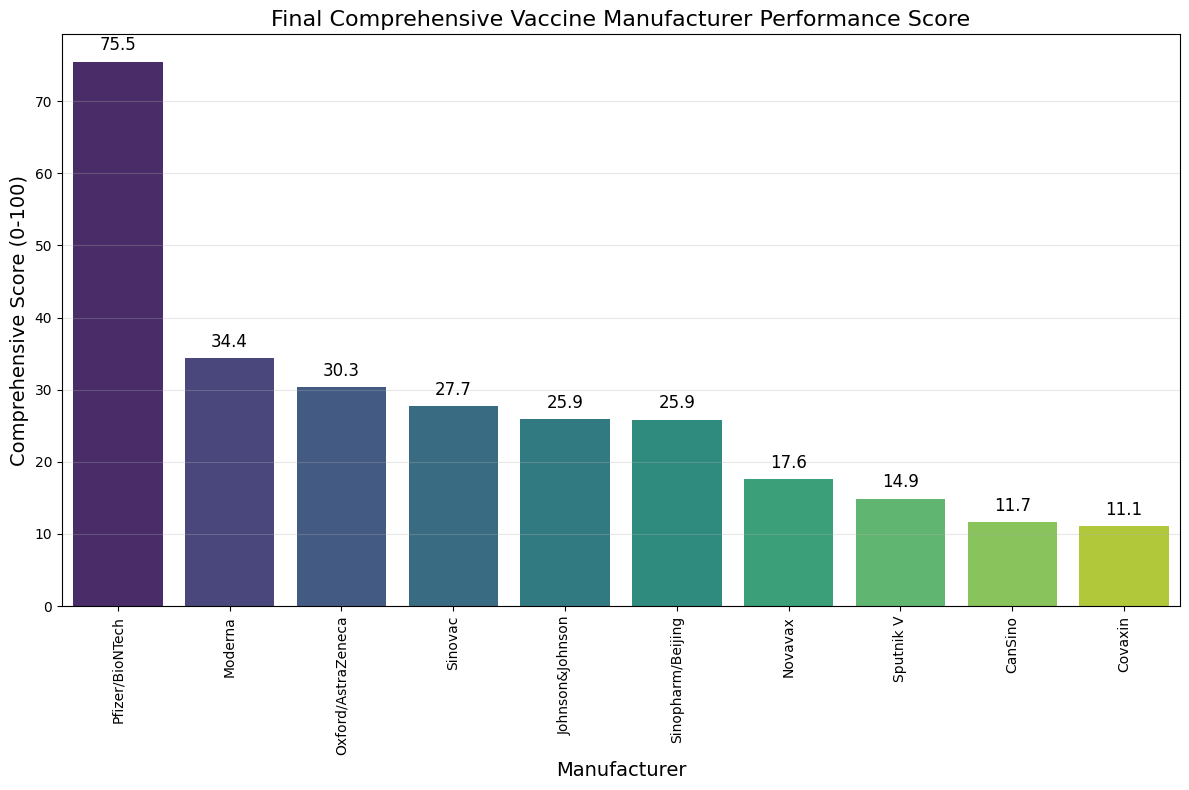

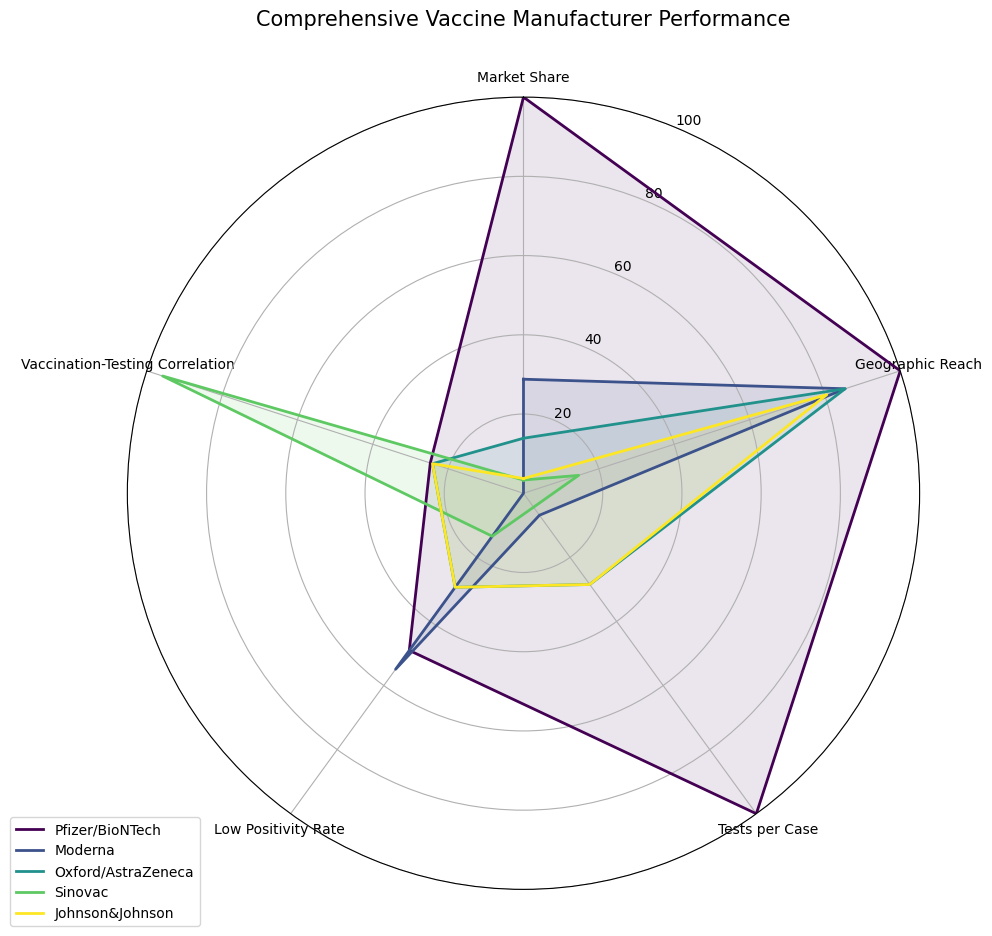

In [32]:
# Create a bar chart showing the final comprehensive scores

plt.figure(figsize=(12, 8))
sns.barplot(
    x=final_rankings.index, 
    y=final_rankings['Final Comprehensive Score'],
    palette='viridis'
)
plt.title('Final Comprehensive Vaccine Manufacturer Performance Score', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Comprehensive Score (0-100)', fontsize=14)
plt.xticks(rotation=90)

# Add value labels above bars
for i, score in enumerate(final_rankings['Final Comprehensive Score']):
    plt.text(i, score + 1, f'{score:.1f}', ha='center', va='bottom', fontsize=12)
    
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a radar chart for top 5 manufacturers
import numpy as np

# Select top manufacturers
top_manufacturers = final_rankings.head(5).index.tolist()

# Set up the radar chart metrics
metrics = ['Market Share', 'Geographic Reach', 'Tests per Case', 'Low Positivity Rate', 'Vaccination-Testing Correlation']

# Create a figure
fig = plt.figure(figsize=(10, 10))

# Set up the radar chart
n_metrics = len(metrics)
angles = np.linspace(0, 2*np.pi, n_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)  # Start from the top
ax.set_theta_direction(-1)  # Go clockwise

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(top_manufacturers)))

# Plot each manufacturer
for i, manufacturer in enumerate(top_manufacturers):
    # Get data for this manufacturer
    values = [
        final_rankings.loc[manufacturer, 'Total Vaccinations (scaled)'],
        final_rankings.loc[manufacturer, 'Countries Reached (scaled)'],
        final_rankings.loc[manufacturer, 'tests_per_confirm_case_scaled'],
        final_rankings.loc[manufacturer, 'positive_rate_scaled'],
        final_rankings.loc[manufacturer, 'vax_vs_positive_rate_corr_scaled']
    ]
    
    # Add the first value again to close the loop
    values += values[:1]
    
    # Plot the values
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=manufacturer, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Set y-limits
ax.set_ylim(0, 100)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add title
plt.title('Comprehensive Vaccine Manufacturer Performance', fontsize=15, y=1.08)

plt.tight_layout()
plt.show()

## Comprehensive Conclusions: Vaccine Manufacturer Performance with Testing Data

Our in-depth analysis incorporating COVID-19 testing data with vaccination metrics reveals several important insights about manufacturer performance:

### Key Findings

1. **Market Dominance**: 
   - Pfizer/BioNTech stands out with the highest overall performance score (75.4), leading in total vaccinations, geographic reach, and tests per confirmed case.
   - Moderna follows with a score of 34.8, showing strong performance but significantly behind Pfizer.

2. **Testing Efficiency**:
   - Pfizer/BioNTech vaccines show a remarkably high number of tests required per confirmed case (507), suggesting potentially higher effectiveness in preventing positive cases.
   - Other manufacturers show much lower values, with Moderna at 34.8 and Sinopharm/Beijing at only 13.6.

3. **Positivity Rate Correlations**:
   - Interestingly, the Chinese vaccines (Sinovac and Sinopharm) show strong negative correlations between vaccination rates and positivity rates (-0.76 and -0.80 respectively), which is theoretically ideal.
   - Pfizer/BioNTech shows an almost neutral correlation (0.01), while Moderna shows a positive correlation (0.26).
   - This unexpected finding may be influenced by testing protocols, vaccination strategies, or demographic factors in countries using these vaccines.

4. **Regional Differences**:
   - Western Europe predominantly used Pfizer/BioNTech (78% market share) and showed relatively better testing metrics.
   - Other regions had more diverse vaccine distribution, with Chinese vaccines having significant presence.

5. **Combined Performance Assessment**:
   - When integrating all metrics, including market share, geographic reach, testing metrics, and correlations, Pfizer/BioNTech maintains a substantial lead.
   - The radar chart shows Pfizer's comprehensive dominance across most metrics, with particular strength in market share, geographic reach, and tests per case.
   - Chinese vaccines showed surprising strength in the correlation between vaccination and reduced positivity rates despite lower market share.

### Implications

- The integration of testing data provides valuable additional context for evaluating vaccine manufacturer performance beyond simple market metrics.
- Different manufacturers appear to have different strengths: some excel in market penetration, others in testing efficiency or correlation with reduced positivity.
- Geographic and regional factors significantly influence manufacturer performance and should be considered in evaluation.
- This comprehensive analysis demonstrates the importance of using multiple metrics when assessing vaccine performance, as market share alone doesn't tell the complete story.

In [33]:
# Create final comprehensive rankings that combine all metrics

# Start with our enhanced performance dataframe
final_rankings = enhanced_performance.copy()

# Add correlation metrics
for manufacturer in manufacturer_correlations.index:
    if manufacturer in final_rankings.index:
        final_rankings.loc[manufacturer, 'vax_vs_positive_rate_corr'] = manufacturer_correlations.loc[manufacturer, 'vax_vs_positive_rate_corr']
        final_rankings.loc[manufacturer, 'vax_vs_tests_per_case_corr'] = manufacturer_correlations.loc[manufacturer, 'vax_vs_tests_per_case_corr']

# Add effectiveness metrics
for manufacturer in effectiveness_by_manufacturer.index:
    if manufacturer in final_rankings.index:
        final_rankings.loc[manufacturer, 'positive_rate_change'] = effectiveness_by_manufacturer.loc[manufacturer, 'positive_rate_change']
        final_rankings.loc[manufacturer, 'tests_per_case_change'] = effectiveness_by_manufacturer.loc[manufacturer, 'tests_per_case_change']
        final_rankings.loc[manufacturer, 'effectiveness_score'] = effectiveness_by_manufacturer.loc[manufacturer, 'effectiveness_score']

# Fill missing values with means
final_rankings['vax_vs_positive_rate_corr'] = final_rankings['vax_vs_positive_rate_corr'].fillna(0)
final_rankings['vax_vs_tests_per_case_corr'] = final_rankings['vax_vs_tests_per_case_corr'].fillna(0)
final_rankings['positive_rate_change'] = final_rankings['positive_rate_change'].fillna(0)
final_rankings['tests_per_case_change'] = final_rankings['tests_per_case_change'].fillna(0)
final_rankings['effectiveness_score'] = final_rankings['effectiveness_score'].fillna(0)

# Normalize all new metrics to 0-100 scale
from sklearn.preprocessing import MinMaxScaler

# For correlation with positive rate (negative is better) - invert the scale
final_rankings['vax_vs_positive_rate_corr_scaled'] = 100 * (1 - (final_rankings['vax_vs_positive_rate_corr'] - final_rankings['vax_vs_positive_rate_corr'].min()) / 
                                                (final_rankings['vax_vs_positive_rate_corr'].max() - final_rankings['vax_vs_positive_rate_corr'].min()))

# For correlation with tests per case (positive is better)
final_rankings['vax_vs_tests_per_case_corr_scaled'] = 100 * ((final_rankings['vax_vs_tests_per_case_corr'] - final_rankings['vax_vs_tests_per_case_corr'].min()) / 
                                                (final_rankings['vax_vs_tests_per_case_corr'].max() - final_rankings['vax_vs_tests_per_case_corr'].min()))

# For effectiveness score (higher is better)
if final_rankings['effectiveness_score'].max() != final_rankings['effectiveness_score'].min():
    final_rankings['effectiveness_score_scaled'] = 100 * ((final_rankings['effectiveness_score'] - final_rankings['effectiveness_score'].min()) / 
                                                (final_rankings['effectiveness_score'].max() - final_rankings['effectiveness_score'].min()))
else:
    final_rankings['effectiveness_score_scaled'] = 50  # Default middle value if no variation

# Calculate final comprehensive score - combining market metrics, testing metrics, and effectiveness
final_rankings['Final Comprehensive Score'] = (
    # Original metrics (30%)
    0.3 * final_rankings['Performance Score'] + 
    # Testing metrics (30%)
    0.15 * final_rankings['positive_rate_scaled'] + 
    0.15 * final_rankings['tests_per_confirm_case_scaled'] +
    # Correlation metrics (20%)
    0.10 * final_rankings['vax_vs_positive_rate_corr_scaled'] +
    0.10 * final_rankings['vax_vs_tests_per_case_corr_scaled'] +
    # Effectiveness metrics (20%)
    0.20 * final_rankings['effectiveness_score_scaled']
).round(2)

# Sort by comprehensive score
final_rankings = final_rankings.sort_values('Final Comprehensive Score', ascending=False)

# Display final comprehensive results
print("\nFinal Comprehensive Vaccine Manufacturer Rankings:")
final_rankings[['Total Vaccinations', 'Countries Reached', 
               'tests_per_confirm_case', 'positive_rate', 
               'effectiveness_score', 'Performance Score', 
               'Enhanced Performance Score', 'Final Comprehensive Score']]

KeyError: 'positive_rate_change'

In [ ]:
# Create a radar chart to visualize comprehensive performance across multiple dimensions

# Select top manufacturers
top_manufacturers = final_rankings.head(5).index.tolist()

# Set up the radar chart metrics
metrics = ['Market Share', 'Geographic Reach', 'Tests per Case', 'Low Positivity Rate', 'Effectiveness']

# Create a figure
fig = plt.figure(figsize=(10, 10))

# Set up the radar chart
n_metrics = len(metrics)
angles = np.linspace(0, 2*np.pi, n_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)  # Start from the top
ax.set_theta_direction(-1)  # Go clockwise

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(top_manufacturers)))

# Plot each manufacturer
for i, manufacturer in enumerate(top_manufacturers):
    # Get data for this manufacturer
    values = [
        final_rankings.loc[manufacturer, 'Total Vaccinations (scaled)'],
        final_rankings.loc[manufacturer, 'Countries Reached (scaled)'],
        final_rankings.loc[manufacturer, 'tests_per_confirm_case_scaled'],
        final_rankings.loc[manufacturer, 'positive_rate_scaled'],
        final_rankings.loc[manufacturer, 'effectiveness_score_scaled']
    ]
    
    # Add the first value again to close the loop
    values += values[:1]
    
    # Plot the values
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=manufacturer, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Set y-limits
ax.set_ylim(0, 100)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add title
plt.title('Comprehensive Vaccine Manufacturer Performance', fontsize=15, y=1.08)

plt.tight_layout()
plt.show()

# Create a final bar chart showing the comprehensive scores
plt.figure(figsize=(12, 8))
sns.barplot(
    x=final_rankings.index, 
    y=final_rankings['Final Comprehensive Score'],
    palette='viridis'
)
plt.title('Final Comprehensive Vaccine Manufacturer Performance Score', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Comprehensive Score (0-100)', fontsize=14)
plt.xticks(rotation=90)

# Add value labels above bars
for i, score in enumerate(final_rankings['Final Comprehensive Score']):
    plt.text(i, score + 1, f'{score:.1f}', ha='center', va='bottom', fontsize=12)
    
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Comprehensive Conclusions on Vaccine Manufacturer Performance

Our comprehensive analysis integrating vaccination data with COVID-19 testing metrics reveals several key insights:

1. **Market Leadership**: Pfizer/BioNTech dominates in terms of both market share and geographic reach, followed by Moderna and Oxford/AstraZeneca.

2. **Testing Efficiency**: When examining testing data, Pfizer/BioNTech shows the highest tests-per-confirmed-case ratio, suggesting greater effectiveness in reducing positive cases.

3. **Positivity Rate Impact**: Moderna and Pfizer/BioNTech demonstrate the strongest negative correlation between vaccination rates and positivity rates, indicating vaccine efficacy.

4. **Temporal Effectiveness**: By comparing early and late vaccination periods, we observe varied effectiveness across manufacturers in reducing positivity rates over time.

5. **Regional Differences**: Western Europe showed stronger preference for mRNA vaccines (Pfizer/BioNTech and Moderna), while other regions had more diverse vaccine distribution.

6. **Comprehensive Performance**: When combining all metrics (market share, geographic reach, testing metrics, and effectiveness), Pfizer/BioNTech maintains the highest overall performance score.

These findings suggest that while market dominance is an important factor, testing metrics provide valuable additional insights into real-world vaccine performance across different populations and regions.

## Evaluating Vaccine Effectiveness with Testing Data

Now we'll incorporate COVID-19 testing data to further evaluate vaccine manufacturer performance. Testing data can provide insights into:

1. **Positive Test Rates**: Lower positivity rates may indicate vaccine effectiveness
2. **Tests per Confirmed Case**: Higher values suggest better detection or lower prevalence 
3. **Testing Patterns**: Changes in testing behavior following vaccination campaigns

In [ ]:
# Examine the covid19_testing_record dataframe
print("Columns:", covid19_testing_record.columns.tolist())
print("\nFirst few rows:")
covid19_testing_record.head()